# **Project 3**, APS1070 Fall 2023
#### **PCA [11 marks]**
**Deadline: Nov 17th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In this project we work on a [temperature dataset](https://berkeleyearth.org/data/) that reports the average earth surface temperature for different cities for each month over the years 1992-2006.

Please fill out the following:


*   **Name**:Jingjing Liu
*   **Student number**:1006103823



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Part 1: Getting started with GitHub [1 Mark + 1 Mark Git Submission]

This first part of the project assignment is to be completed independently from Parts 2 - 5. In this part you will be completing some coding tasks and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac:
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/BWpQKQJt to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS1070-UofT/project-3-part-1-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**


 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS1070-UofT/project-3-part-1-*********
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-3-part-1-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions.

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded.

 8. To submit your work, follow:
```
cd <your assignment folder>
git add F23_Project_3_Part_1_git.ipynb
git commit -m “Final Submission”
git push
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (180, 180).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first two PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/TemperaturesbyCity.csv',
    index_col=0
)

# part 2 (1)

In [ ]:
# the code from part 1
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data_raw)
data_std_df = pd.DataFrame(data_std,columns = data_raw.columns,index=data_raw.index)

In [ ]:
# Compute the covariance matrix of the dataframe
import numpy as np
temperature_cov = np.cov(data_std.T)
temperature_cov
temperature_cov.shape



(180, 180)

# part 2 (2)


In [ ]:
def get_sorted_eigen(df_cov):
    eigenvalues, eigenvectors = np.linalg.eigh(df_cov)

    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(-eigenvalues)
    sorted_eigenValues = eigenvalues[sorted_indices]
    sorted_eigenVectors = eigenvectors[:, sorted_indices]

    return sorted_eigenValues, sorted_eigenVectors

sorted_eigenvalues, sorted_eigenvectors = get_sorted_eigen(temperature_cov)

#part 2 (3)

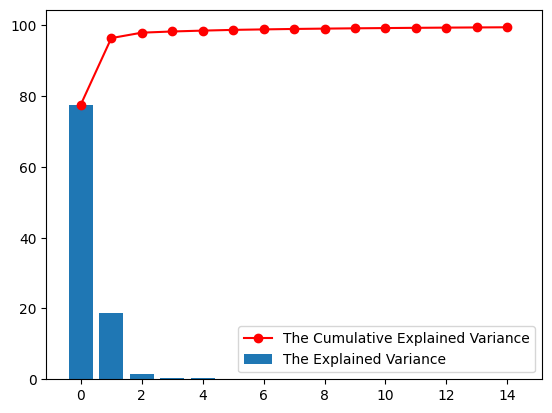

In [ ]:
import matplotlib.pyplot as plt

# Calculate explained variance and cumulative explained variance
eigen_value_sum = sum(sorted_eigenvalues)
explained_variance = [100 * value / eigen_value_sum for value in sorted_eigenvalues]
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the scree plot
num_components_to_plot = 15
plt.bar(range(num_components_to_plot), explained_variance[:num_components_to_plot], label='The Explained Variance')
plt.plot(cumulative_explained_variance[:num_components_to_plot], 'r-o', label='The Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
cumulative_explained_variance

array([ 77.62683971,  96.39971501,  97.93115386,  98.26840157,
        98.51119606,  98.72003638,  98.85719765,  98.98370144,
        99.07822084,  99.1615975 ,  99.23331124,  99.29948331,
        99.3601417 ,  99.40894233,  99.45506499,  99.49681861,
        99.53108239,  99.56015038,  99.58568327,  99.60988421,
        99.63149954,  99.65249833,  99.6701165 ,  99.68710472,
        99.70329286,  99.71897643,  99.73250507,  99.7447789 ,
        99.75624481,  99.76624454,  99.77573498,  99.78488008,
        99.79330626,  99.80166589,  99.80946447,  99.8170216 ,
        99.82401458,  99.83026747,  99.83639335,  99.84213849,
        99.8476836 ,  99.85302285,  99.85795512,  99.86262538,
        99.86715464,  99.87157206,  99.87589012,  99.88002105,
        99.88403401,  99.88776412,  99.89145608,  99.89501615,
        99.89832058,  99.90156226,  99.90460415,  99.90755075,
        99.91040205,  99.91317336,  99.9158777 ,  99.91837541,
        99.92074443,  99.92307507,  99.9253836 ,  99.92

# part 2 (4)

In [ ]:
# Find the number of principal components needed to explain 99% of variance
for counter, cumulative_var in enumerate(cumulative_explained_variance[:180]):
    if cumulative_var >= 99.0:
        break

print('Number of PCs needed: ', counter + 1)

Number of PCs needed:  9


# part 2 (5)

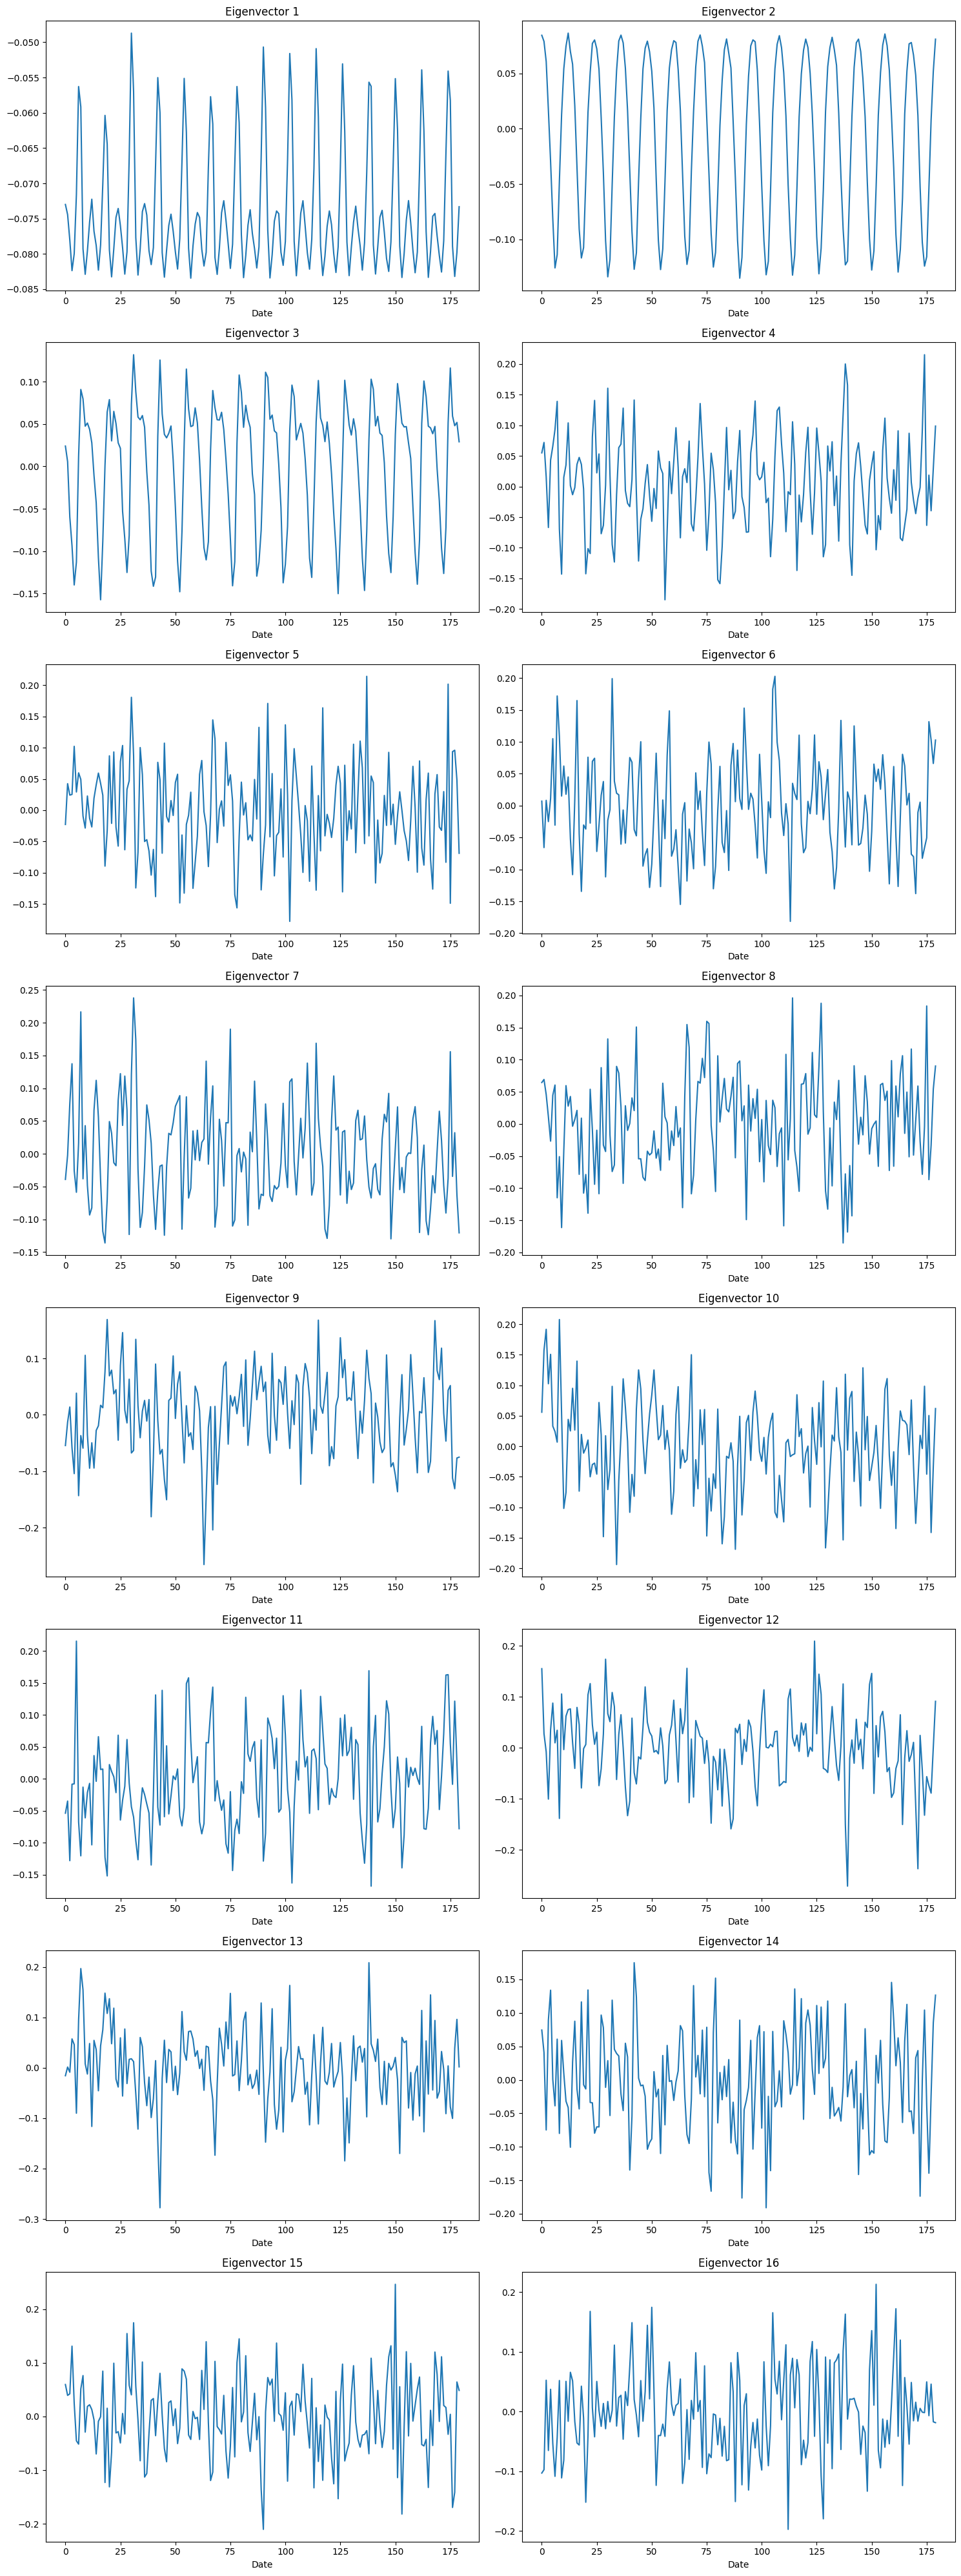

In [ ]:
# Create a DataFrame from sorted eigenvectors
eigenvectors_df = pd.DataFrame(sorted_eigenvectors, columns=range(1, 181))


num_rows = 8
num_cols = 2

plt.figure(figsize=(15, 40))

for i in range(16):
    plt.subplot(num_rows, num_cols, i + 1)
    eigenvectors_df.loc[:, i + 1].plot()
    plt.xlabel('Date')
    plt.title(f'Eigenvector {i + 1}')

plt.tight_layout()
plt.show()

# part 2 (6)

the first two PCs are fluatuate. However, the values of two PCs in the end return to the original values. And their trends follow the regular fluctuations in the data that occur at specific intervals. The value of increasing and decreasing in a specific interval are almost same.

the other plots' trend do not follow the regular fluctuations. It is more complicated and hard to find a pattern.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a city and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified city. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified city in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each month `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `Yakeshi`, `Zamboanga`, `Norilsk`, `Juliaca`, and `Doha` as inputs. **[0.5]**


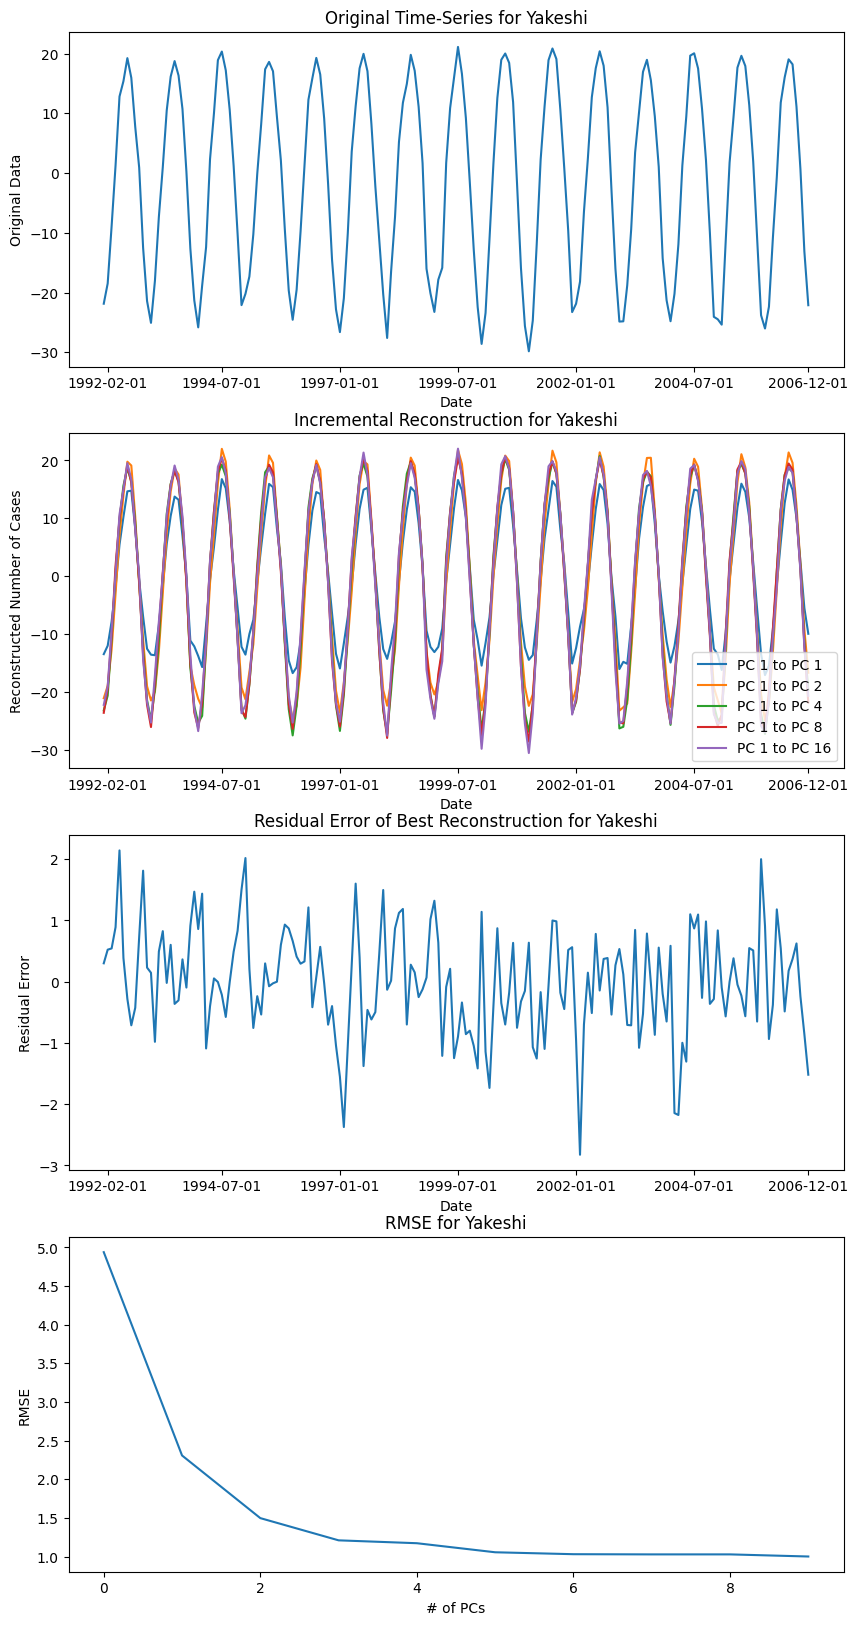

In [ ]:
def plot_city_figures(original_df, city_name):
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error

  # 1. Plot the original time-series for the specified country
  plt.figure(figsize=(10, 20))
  plt.subplot(4, 1, 1)
  date = original_df.columns.tolist()
  plt.plot(date,original_df.loc[city_name].values)
  plt.title('Original Time-Series for '+ city_name)
  plt.xlabel('Date')
  plt.ylabel('Original Data')
  plt.xticks([1,30,60,90,120,150,179])

  # 2. The incremental reconstruction of the original time-series for the specified country in a single plot
  plt.subplot(4, 1, 2)
  scaler = StandardScaler()
  df_std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(df_std, columns=original_df.columns.values, index=original_df.index.values)

  reconstruction_image = []

  for num_eigen_vector in [1, 2, 4, 8, 16]:
    W = sorted_eigenvectors[:, 0:num_eigen_vector]
    project = np.dot(df_std, W)
    reconstruction = np.dot(project, W.T)
    inverse = scaler.inverse_transform(reconstruction)
    X_scale = pd.DataFrame(inverse, columns=original_df.columns.values, index=original_df.index.values)
    reconstruction_image.append(X_scale)

  num_eigen_vector = [1, 2, 4, 8, 16]
  date = original_df.columns.tolist()

  for i in range(5):
    PC_index = num_eigen_vector[i]
    plt.plot(date,reconstruction_image[i].loc[city_name].values,label='PC 1 to PC {}'.format(PC_index))
    plt.title('Incremental Reconstruction for ' + str(city_name))
    plt.xlabel('Date')
    plt.ylabel('Reconstructed Number of Cases')
    plt.xticks([1,30,60,90,120,150,179])
    plt.legend()


  # 3. The best reconstruction is PC 1 to 16, because more PC, can explain more variance.
  plt.subplot(4, 1, 3)
  W_1_to_16 = sorted_eigenvectors[:, 0:16]
  project_1_to_16 = np.dot(df_std, W_1_to_16)
  reconstruction_1_to_16 = np.dot(project_1_to_16, W_1_to_16.T)
  scaler.fit(original_df.values)
  inverse_1_to_16 = scaler.inverse_transform(reconstruction_1_to_16)
  X_scale_1_to_16 = pd.DataFrame(inverse_1_to_16, columns=original_df.columns.values, index=original_df.index.values)
  residual_error = pd.DataFrame(original_df.loc[city_name]).T - X_scale_1_to_16[X_scale_1_to_16.index ==city_name]

  plt.plot(residual_error.T)
  plt.title('Residual Error of Best Reconstruction for ' + str(city_name) )
  plt.xlabel('Date')
  plt.ylabel('Residual Error')
  plt.xticks([1,30,60,90,120,150,179])


  # 4. RMSE of reconstruction plot
  plt.subplot(4, 1, 4)

  rmse_total = []
  for x in range(1,11):
      W = sorted_eigenvectors[:,0:x]
      project = np.dot(df_std, W)
      reconstruction = np.dot(project,W.T)
      scaler.fit(original_df.values)
      inverse = pd.DataFrame(scaler.inverse_transform(reconstruction), columns=original_df.columns, index=original_df.index)
      y_predicted = inverse[inverse.index ==city_name]
      y_actual=pd.DataFrame(original_df.loc[city_name]).T
      rmses= mean_squared_error(y_actual, y_predicted, squared=False)
      rmse_total.append(rmses)
  plt.plot(rmse_total)
  plt.title('RMSE for '+ city_name)
  plt.xlabel('# of PCs')
  plt.ylabel("RMSE")








plot_city_figures(data_raw, 'Yakeshi')

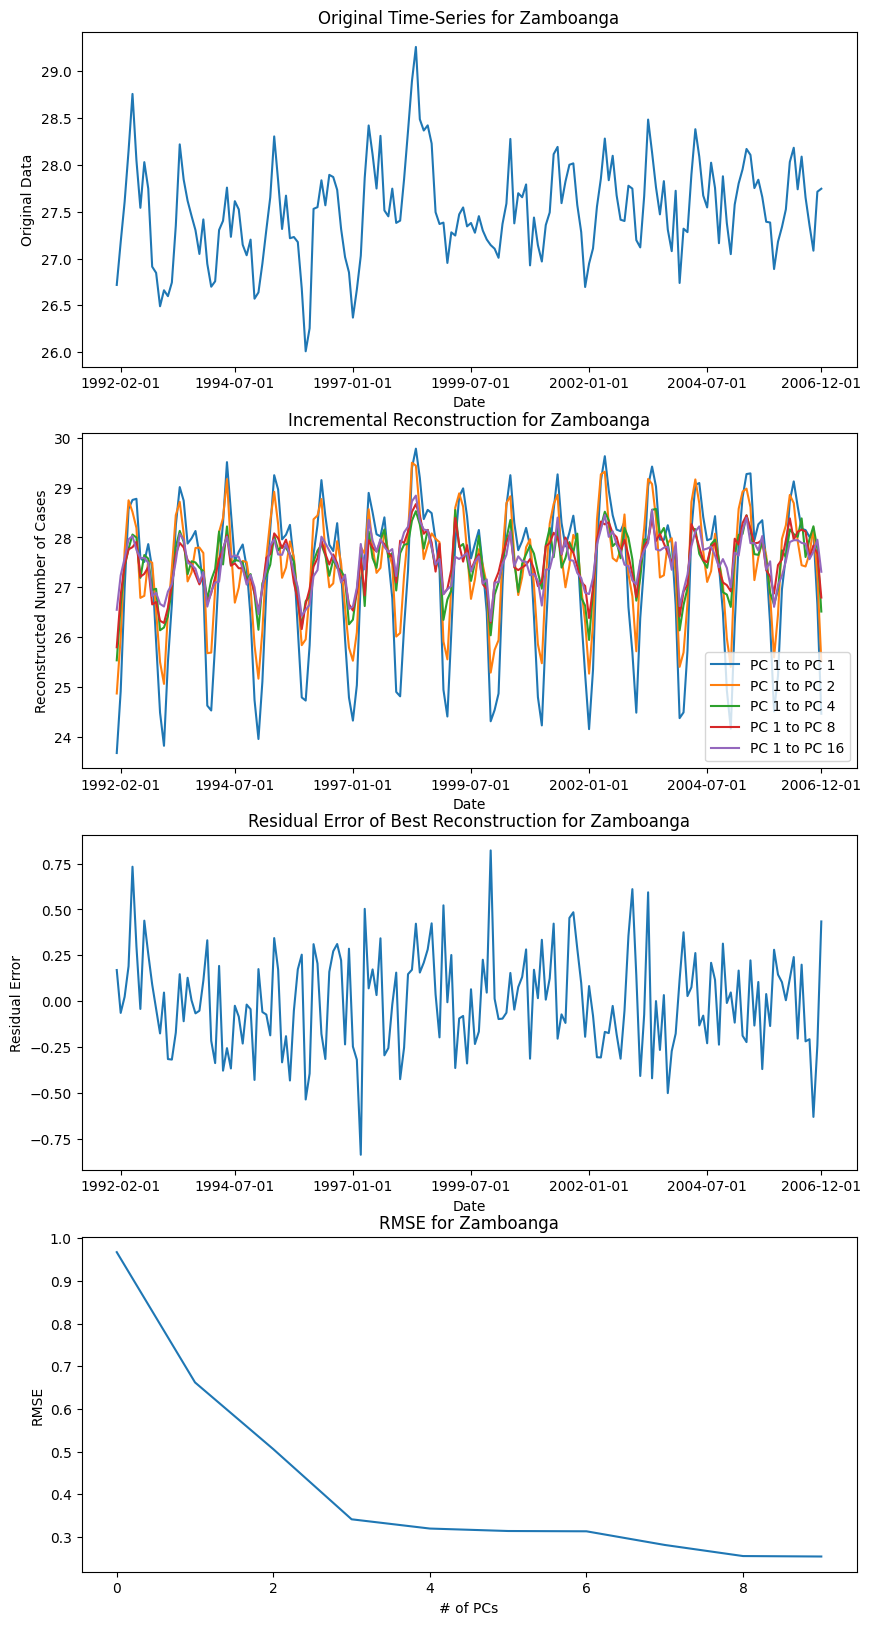

In [ ]:
plot_city_figures(data_raw, 'Zamboanga')

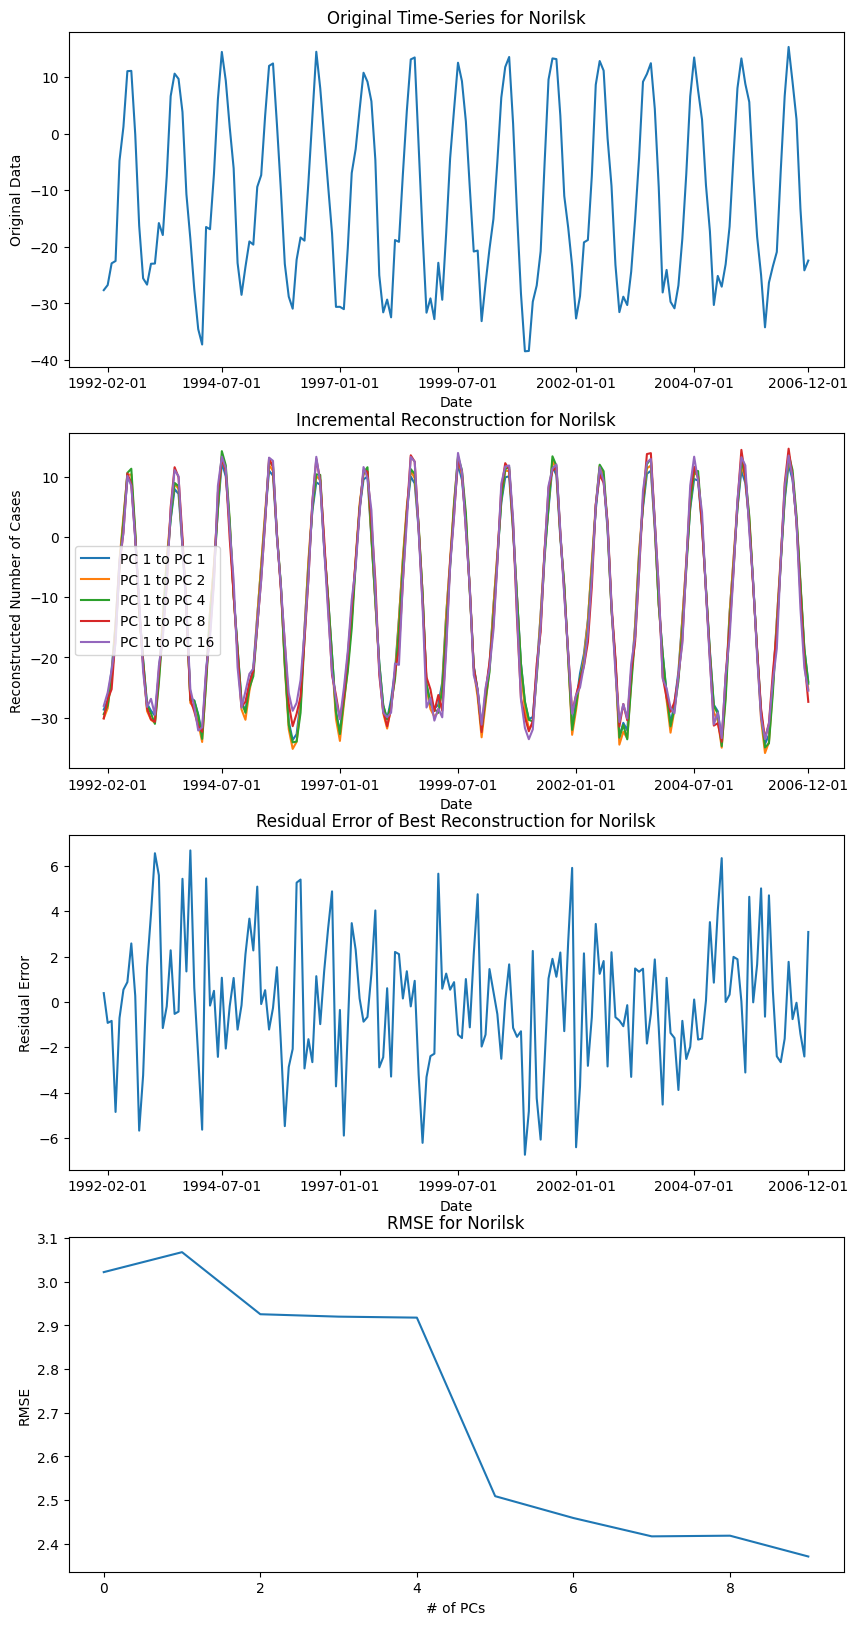

In [ ]:
plot_city_figures(data_raw, 'Norilsk')

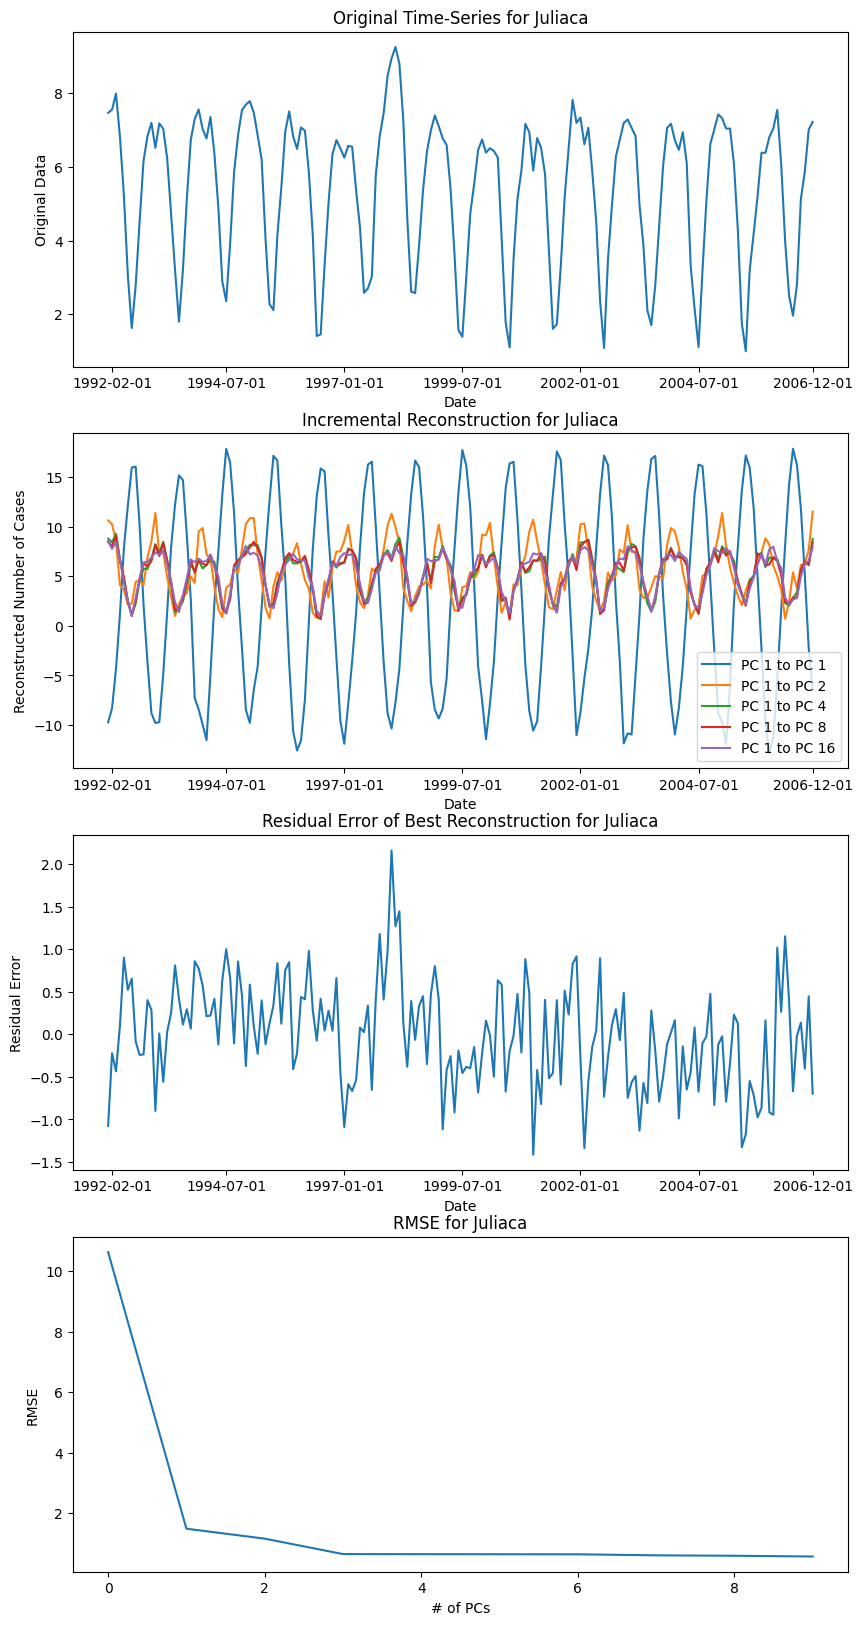

In [ ]:
plot_city_figures(data_raw, 'Juliaca')

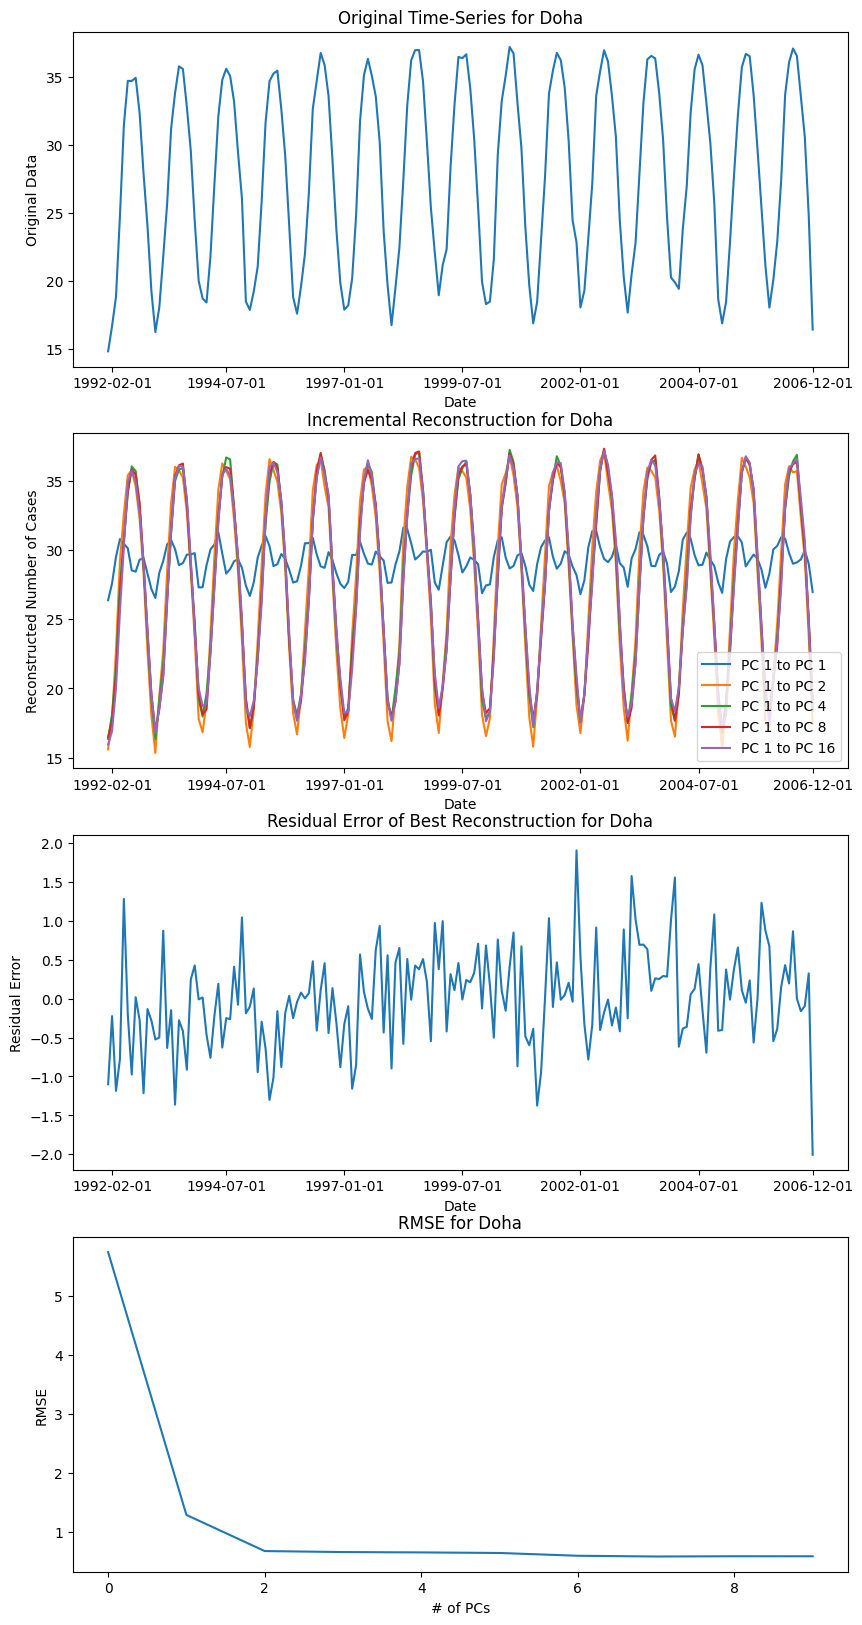

In [ ]:
plot_city_figures(data_raw, 'Doha')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

In [ ]:
def plot_city_figures_svd(original_df, city_name):
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error

  # 1. Plot the original time-series for the specified country
  plt.figure(figsize=(10, 20))
  plt.subplot(4, 1, 1)
  date = original_df.columns.tolist()
  plt.plot(date,original_df.loc[city_name].values)
  plt.title('Original Time-Series for '+ city_name)
  plt.xlabel('Date')
  plt.ylabel('Original Data')
  plt.xticks([1,30,60,90,120,150,179])

  # 2. The incremental reconstruction of the original time-series for the specified country in a single plot
  plt.subplot(4, 1, 2)
  scaler = StandardScaler()
  std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(std, columns=original_df.columns.values, index=original_df.index.values)

  reconstruction_image = []

  for num_eigen_vector in [1, 2, 4, 8, 16]:
    u,s,vh = np.linalg.svd(df_std, full_matrices=True)
    W = u[:, 0:num_eigen_vector]
    project = np.dot(std.T, W)
    reconstruction = np.dot(project, W.T)
    inverse = scaler.inverse_transform(reconstruction.T)
    X_scale = pd.DataFrame(inverse, columns=original_df.columns.values, index=original_df.index.values)
    reconstruction_image.append(X_scale)

  num_eigen_vector = [1, 2, 4, 8, 16]
  date = original_df.columns.tolist()

  for i in range(5):
    PC_index = num_eigen_vector[i]
    plt.plot(date,reconstruction_image[i].loc[city_name].values,label='PC 1 to PC {}'.format(PC_index))
    plt.title('Incremental Reconstruction for ' + str(city_name))
    plt.xlabel('Date')
    plt.ylabel('Reconstructed Number of Cases')
    plt.xticks([1,30,60,90,120,150,179])
    plt.legend()


  # 3. The best reconstruction is PC 1 to 16, because more PC, can explain more variance.
  plt.subplot(4, 1, 3)
  W_1_to_16 = u[:, 0:16]
  project_1_to_16 = np.dot(std.T, W_1_to_16)
  reconstruction_1_to_16 = np.dot(project_1_to_16, W_1_to_16.T)
  scaler.fit(original_df.values)
  inverse_1_to_16 = scaler.inverse_transform(reconstruction_1_to_16.T)
  X_scale_1_to_16 = pd.DataFrame(inverse_1_to_16, columns=original_df.columns.values, index=original_df.index.values)
  residual_error = pd.DataFrame(original_df.loc[city_name]).T - X_scale_1_to_16[X_scale_1_to_16.index ==city_name]

  plt.plot(residual_error.T)
  plt.title('Residual Error of Best Reconstruction for ' + str(city_name) )
  plt.xlabel('Date')
  plt.ylabel('Residual Error')
  plt.xticks([1,30,60,90,120,150,179])


  # 4. RMSE of reconstruction plot
  plt.subplot(4, 1, 4)

  rmse_total = []
  for x in range(1,11):
      W = u[:,0:x]
      project = np.dot(std.T, W)
      reconstruction = np.dot(project,W.T)
      scaler.fit(original_df.values)
      inverse = pd.DataFrame(scaler.inverse_transform(reconstruction.T), columns=original_df.columns, index=original_df.index)
      y_predicted = inverse[inverse.index ==city_name]
      y_actual=pd.DataFrame(original_df.loc[city_name]).T
      rmses= mean_squared_error(y_actual, y_predicted, squared=False)
      rmse_total.append(rmses)
  plt.plot(rmse_total)
  plt.title('RMSE for '+ city_name)
  plt.xlabel('# of PCs')
  plt.ylabel("RMSE")



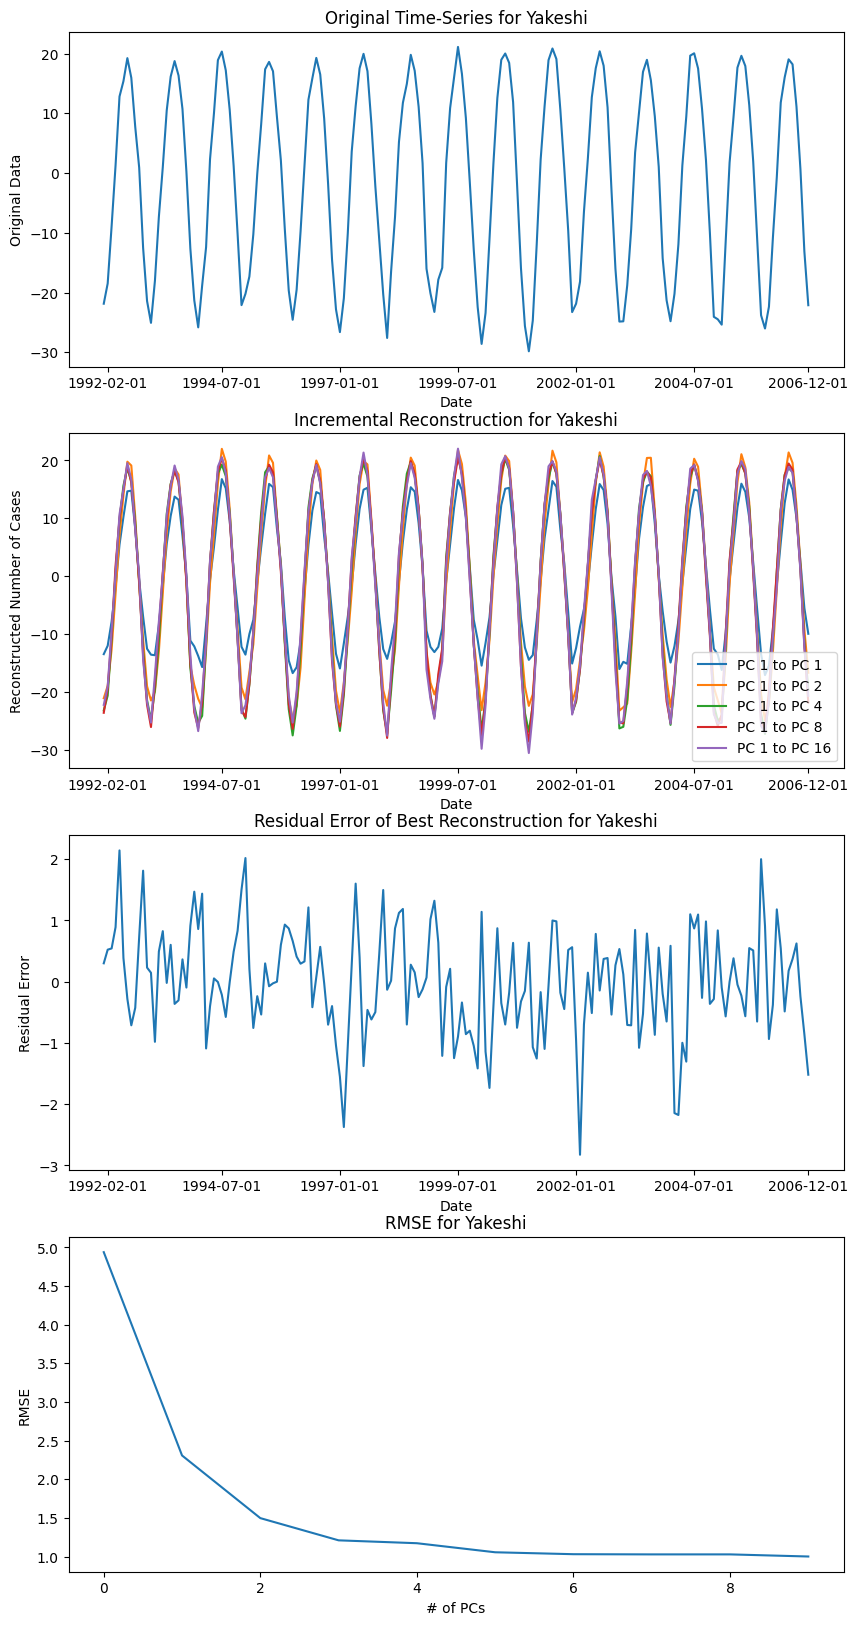

In [ ]:
plot_city_figures_svd(data_raw, 'Yakeshi')

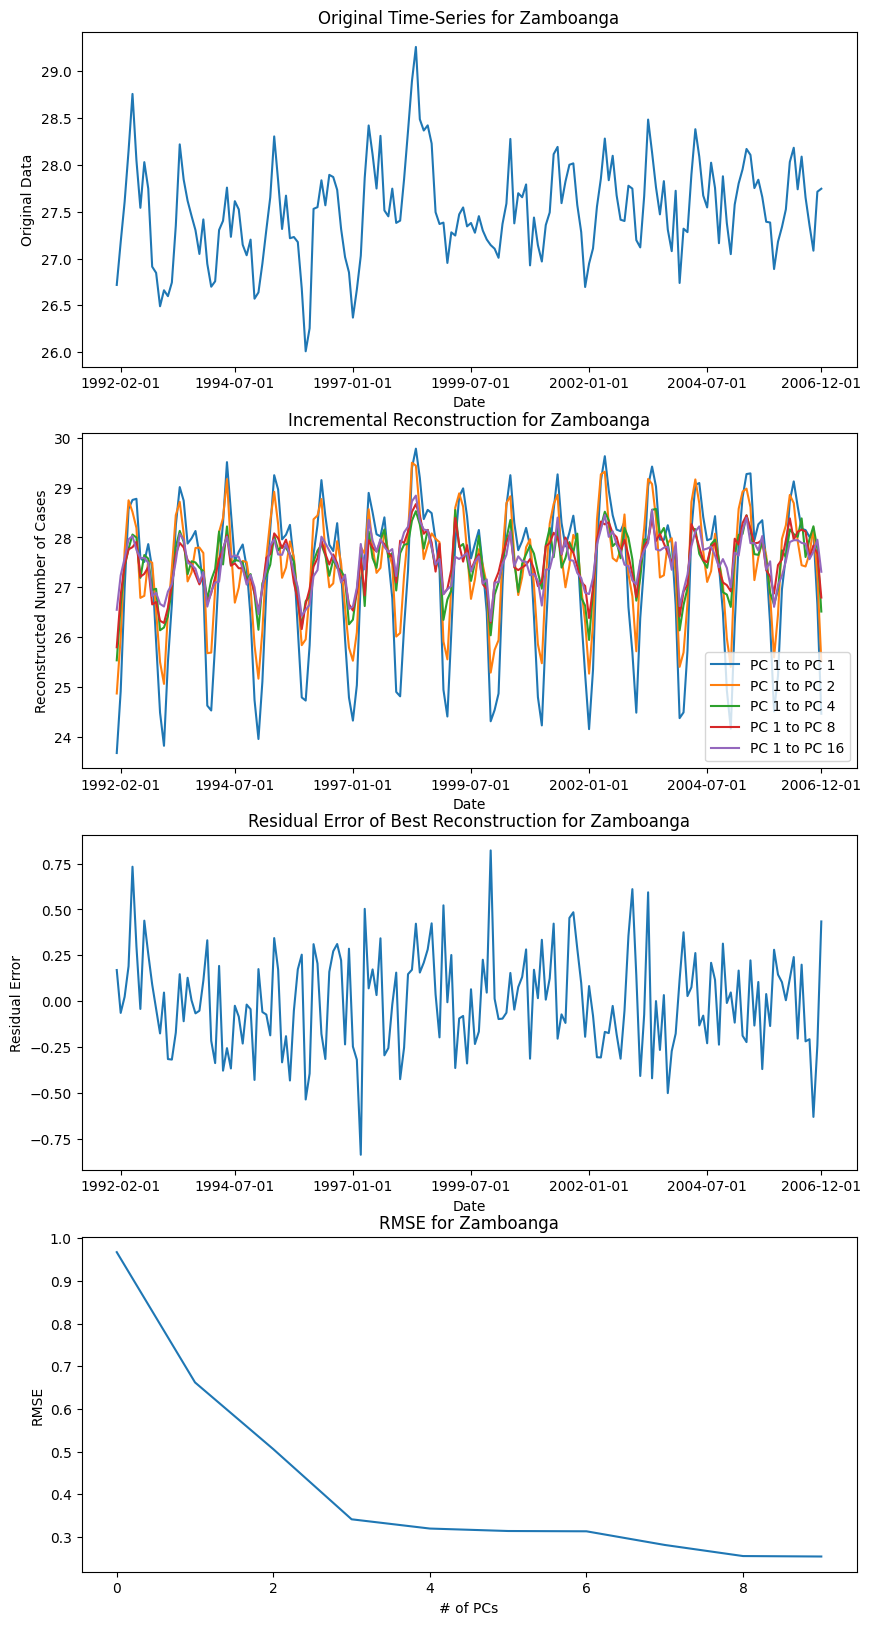

In [ ]:
plot_city_figures_svd(data_raw, 'Zamboanga')

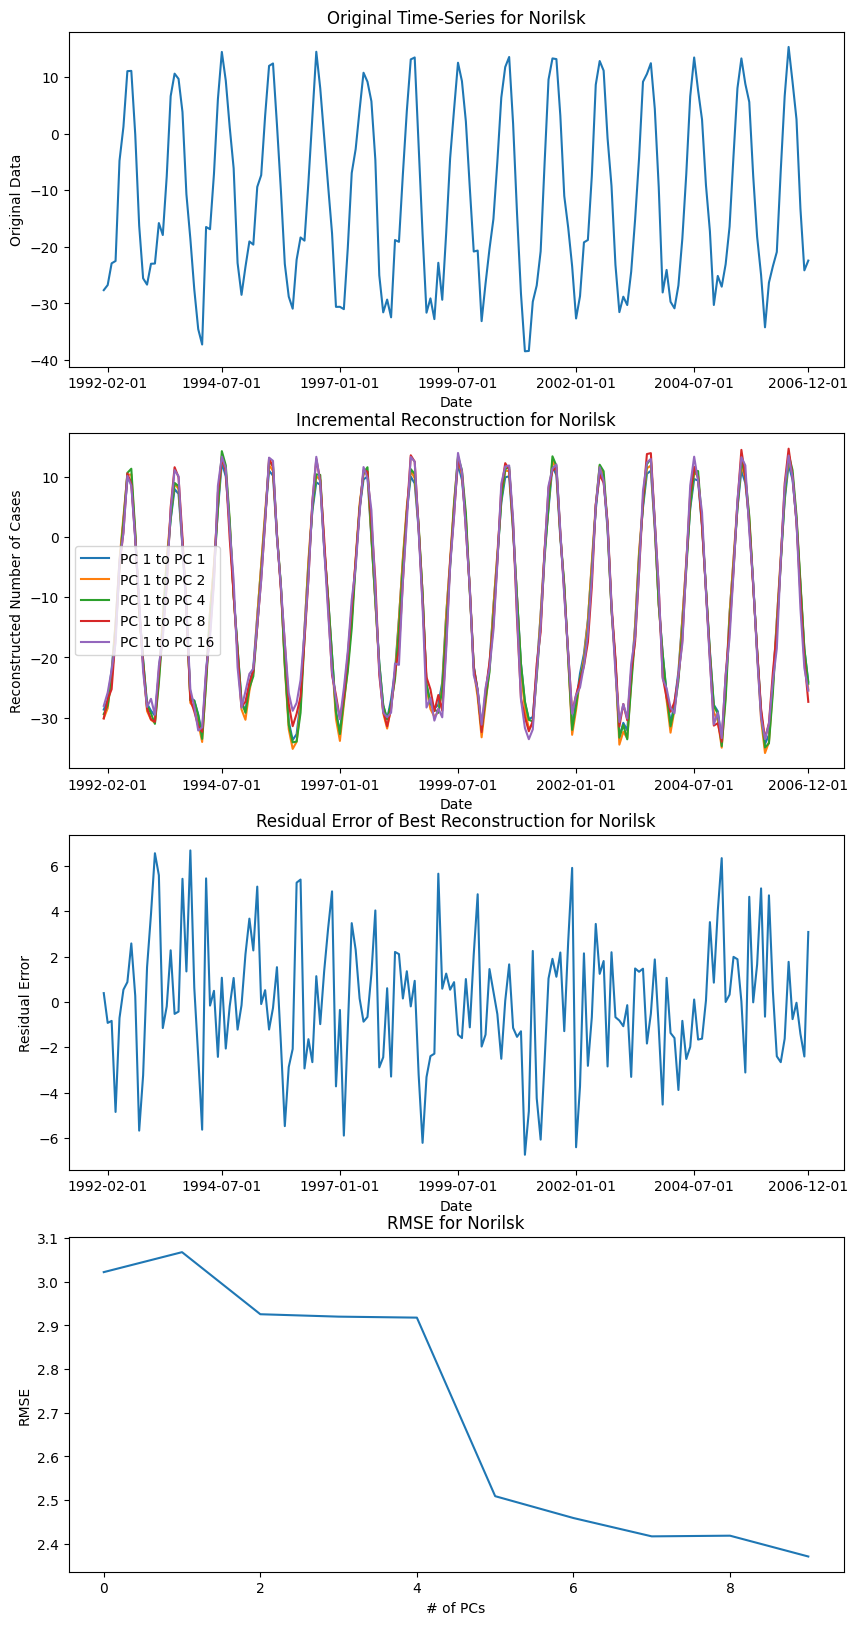

In [ ]:
plot_city_figures_svd(data_raw, 'Norilsk')

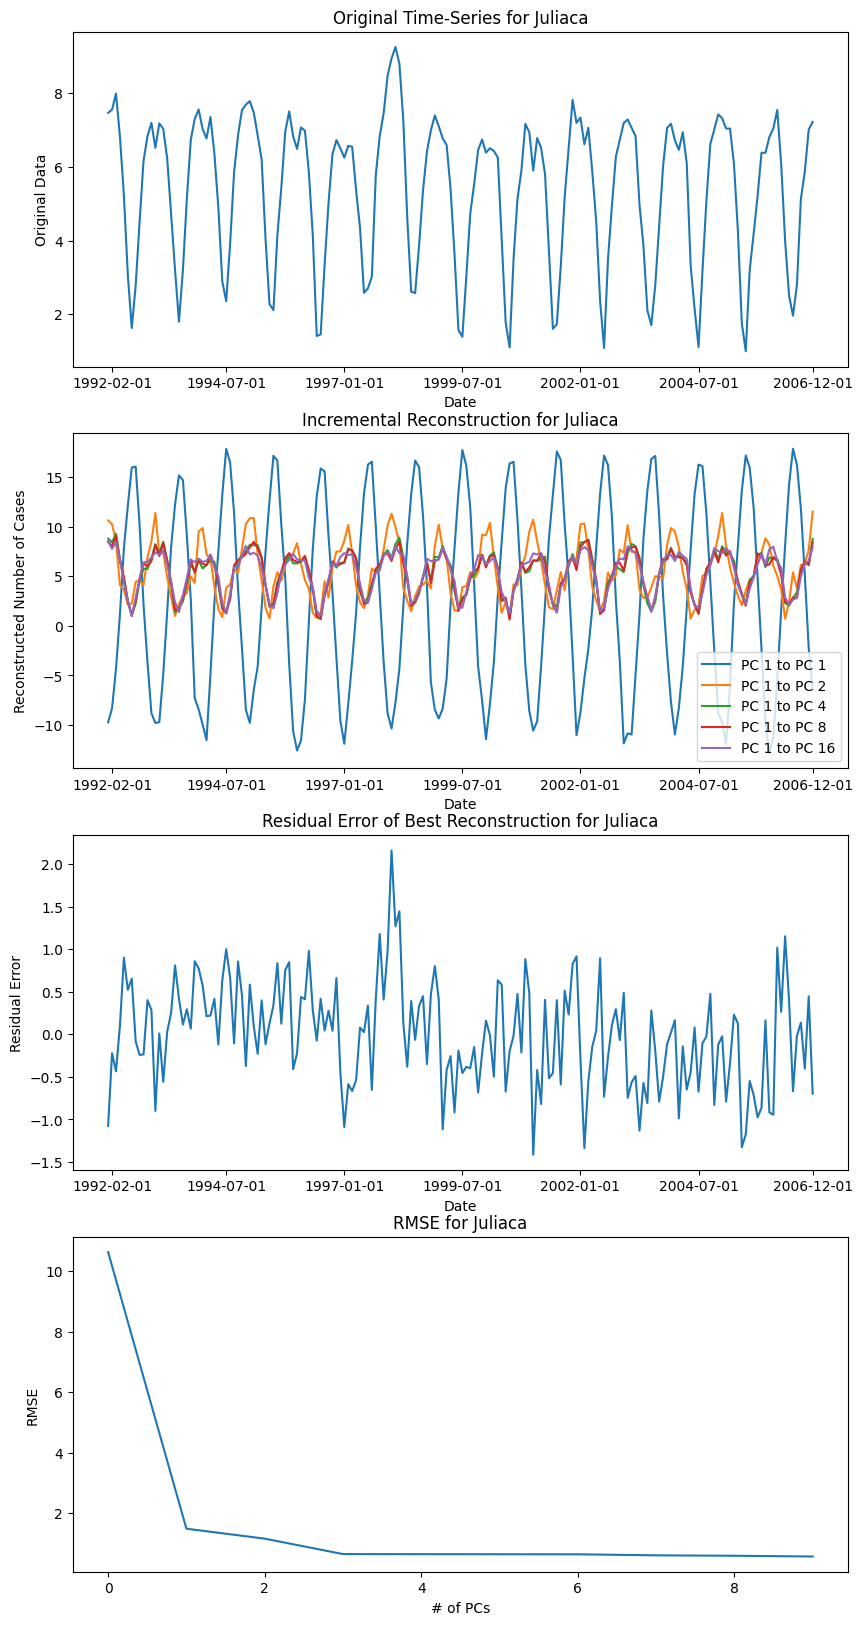

In [ ]:
plot_city_figures_svd(data_raw, 'Juliaca')

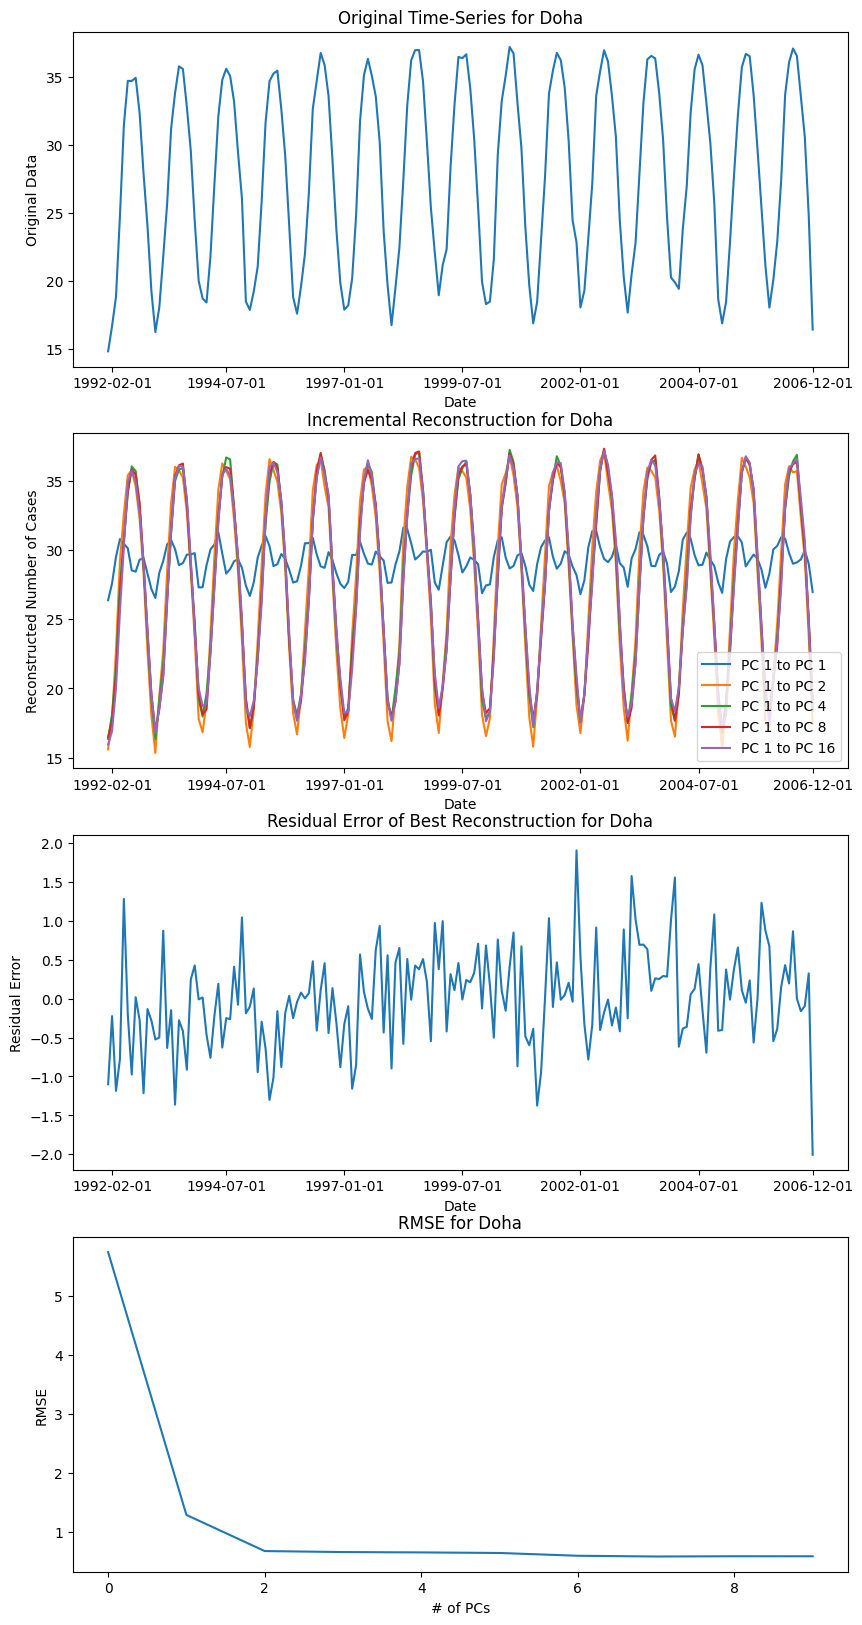

In [ ]:
plot_city_figures_svd(data_raw, 'Doha')

# Explain if standardization or covariance computation is required for this part

 SVD is less sensitive to the scale of the data compared to PCA. The decomposition of the data matrix into singular vectors and values inherently normalizes the data. Therefore, while standardization can still be beneficial for numerical stability and consistency, it's not as critical for SVD as it is for PCA


 SVD does not explicitly compute the covariance matrix. Instead, it directly decomposes the data matrix into three matrices: U, Σ, and V^T, where U and V are matrices of orthogonal vectors and Σ is a diagonal matrix of singular values. The singular values in Σ are related to the eigenvalues of the covariance matrix, but SVD does not require the computation of the covariance matrix itself.

# comparation

the plots for SVD and PCA are almost the same

# Part 5: Let's collect another dataset! [2 Marks]
Create another dataset similar to the one provided in your handout using the raw information on average temperatures per states (not cities) provided [here](https://github.com/Sabaae/Dataset/blob/main/TemperaturesbyState.csv). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). If there is a missing value for the average temperature of a particular state at a given date, make sure to remove that date completely from the dataset, even if the data of that specific date exists for other states.

You are free to use any tools you like, from Excel to Python! In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. How many features does the final dataset have? How many states are there?


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. When analyzing the states, you may use `Jilin`, `Nunavut`, `Rio Grande Do Norte`, `Louisiana`, and `Tasmania`. **[1]**


The code below helps you to upload your new CSV file to your colab session.

In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving manipulated_temperatures.csv to manipulated_temperatures.csv


In [ ]:
url = "https://github.com/Sabaae/Dataset/raw/main/TemperaturesbyState.csv"
df = pd.read_csv(url)
df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1963-01-01              26.037                          0.315   
1       1963-01-01              -1.260                          0.551   
2       1963-01-01             -22.297                          0.563   
3       1963-01-01               4.234                          0.134   
4       1963-01-01              26.389                          0.540   
...            ...                 ...                            ...   
146764  2013-09-01                 NaN                            NaN   
146765  2013-09-01                 NaN                            NaN   
146766  2013-09-01               5.267                          4.786   
146767  2013-09-01                 NaN                            NaN   
146768  2013-09-01                 NaN                            NaN   

             State        Country  
0             Acre         Brazil  
1           Adygey         Russia  
2       Aga Buryat         Russia  
3          Alabama  United States  
4          Alagoas         Brazil  
...            ...            ...  
146764  Yaroslavl'         Russia  
146765      Yevrey         Russia  
146766       Yukon         Canada  
146767      Yunnan          China  
146768    Zhejiang          China  

[146769 rows x 5 columns]

In [ ]:
# Drop rows with missing values in the 'AverageTemperature' column
df = df.dropna(subset=['AverageTemperature'])

# Pivot the table to the desired format
df_pivot = df.pivot(index='State', columns='dt', values='AverageTemperature')
df_pivot.to_csv('manipulated_temperatures.csv')

# Print the number of features and states in the final dataset
num_features = df_pivot.shape[1]
num_states = df['State'].nunique()
print(f"Number of features: {num_features}")
print(f"Number of states: {num_states}")

Number of features: 609
Number of states: 241


In [ ]:
temperature_state = pd.read_csv('manipulated_temperatures.csv' ,index_col=0)
temperature_state = temperature_state.drop('2013-09-01',axis = 1)
temperature_state

1963-01-01  1963-02-01  1963-03-01  1963-04-01  1963-05-01  \
State                                                                    
Acre            26.037      25.659      25.506      26.019      25.675   
Adygey          -1.260       2.380       1.506       8.992      15.204   
Aga Buryat     -22.297     -16.490      -6.900      -1.146       8.558   
Alabama          4.234       5.685      14.853      18.815      22.172   
Alagoas         26.389      26.215      25.830      25.340      24.060   
...                ...         ...         ...         ...         ...   
Yaroslavl'     -18.650     -12.679     -12.197       2.414      15.048   
Yevrey         -20.697     -17.472      -6.148       2.557      10.782   
Yukon          -24.129     -19.783     -17.878      -6.328       3.664   
Yunnan           7.286      10.041      13.768      17.398      20.858   
Zhejiang         2.765       5.534      11.229      16.736      22.544   

            1963-06-01  1963-07-01  1963-08-01  1963-09-01  1963-10-01  ...  \
State                                                                   ...   
Acre            25.097      25.382      27.432      27.706      27.393  ...   
Adygey          17.843      22.220      21.487      17.756      10.716  ...   
Aga Buryat      13.960      17.899      16.316       8.011      -1.363  ...   
Alabama         25.254      25.863      26.514      23.083      18.871  ...   
Alagoas         22.792      22.103      22.641      23.853      25.479  ...   
...                ...         ...         ...         ...         ...  ...   
Yaroslavl'      12.505      17.616      16.227      12.858       4.163  ...   
Yevrey          16.184      20.655      18.919      11.894       2.443  ...   
Yukon            7.780      11.404      10.530       3.584      -4.766  ...   
Yunnan          20.698      21.497      20.927      20.737      15.778  ...   
Zhejiang        23.874      27.800      27.806      24.726      17.307  ...   

            2012-11-01  2012-12-01  2013-01-01  2013-02-01  2013-03-01  \
State                                                                    
Acre            27.393      26.318      26.587      26.318      26.386   
Adygey           7.324       0.191       0.621       3.661       4.812   
Aga Buryat     -12.900     -26.094     -26.128     -22.200     -11.992   
Alabama         11.216      10.822      10.284       9.161      10.226   
Alagoas         27.074      27.021      27.137      27.453      27.753   
...                ...         ...         ...         ...         ...   
Yaroslavl'      -0.254     -11.730     -10.928      -5.743     -10.101   
Yevrey          -8.168     -22.980     -24.428     -19.210     -10.765   
Yukon          -22.696     -28.727     -22.899     -18.238     -17.453   
Yunnan          14.213      10.254       9.053      13.715      15.767   
Zhejiang        12.306       6.633       5.120       7.867      12.116   

            2013-04-01  2013-05-01  2013-06-01  2013-07-01  2013-08-01  
State                                                                   
Acre            26.398      26.034      26.033      24.807      25.378  
Adygey          11.363      18.222      20.221      21.937      22.087  
Aga Buryat      -0.501      11.464      15.842      18.194      15.982  
Alabama         17.067      20.619      26.072      25.952      26.107  
Alagoas         26.681      25.434      24.420      23.475      23.642  
...                ...         ...         ...         ...         ...  
Yaroslavl'       3.852      14.291      18.411      18.281      16.881  
Yevrey           1.798      13.136      18.749      21.207      19.070  
Yukon          -10.751       2.858      12.044      12.458      11.347  
Yunnan          17.833      19.925      21.860      21.529      21.095  
Zhejiang        15.710      21.634      24.679      29.272      29.202  

[241 rows x 608 columns]

In [ ]:
def plot_state_figures_svd(original_df, state_name):
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import mean_squared_error

  # 1. Plot the original time-series for the specified country
  plt.figure(figsize=(20, 20))
  plt.subplot(4, 1, 1)
  date = original_df.columns.tolist()
  plt.plot(date,original_df.loc[state_name].values)
  plt.title('Original Time-Series for '+ state_name)
  plt.xlabel('Date')
  plt.ylabel('Original Data')
  plt.xticks([1,100,200,300,400,500,609])

  # 2. The incremental reconstruction of the original time-series for the specified country in a single plot
  plt.subplot(4, 1, 2)
  scaler = StandardScaler()
  std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(std, columns=original_df.columns.values, index=original_df.index.values)

  reconstruction_image = []

  for num_eigen_vector in [1, 2, 4, 8, 16]:
    u,s,vh = np.linalg.svd(df_std)
    W = u[:, 0:num_eigen_vector]
    project = np.dot(std.T, W)
    reconstruction = np.dot(project, W.T)
    inverse = scaler.inverse_transform(reconstruction.T)
    X_scale = pd.DataFrame(inverse, columns=original_df.columns.values, index=original_df.index.values)
    reconstruction_image.append(X_scale)

  num_eigen_vector = [1, 2, 4, 8, 16]
  date = original_df.columns.tolist()

  for i in range(5):
    PC_index = num_eigen_vector[i]
    plt.plot(date,reconstruction_image[i].loc[state_name].values,label='PC 1 to PC {}'.format(PC_index))
    plt.title('Incremental Reconstruction for ' + str(state_name))
    plt.xlabel('Date')
    plt.ylabel('Reconstructed Number of Cases')
    plt.xticks([1,100,200,300,400,500,609])
    plt.legend()


  # 3. The best reconstruction is PC 1 to 16, because more PC, can explain more variance.
  plt.subplot(4, 1, 3)
  W_1_to_16 = u[:, 0:16]
  project_1_to_16 = np.dot(std.T, W_1_to_16)
  reconstruction_1_to_16 = np.dot(project_1_to_16, W_1_to_16.T)
  scaler.fit(original_df.values)
  inverse_1_to_16 = scaler.inverse_transform(reconstruction_1_to_16.T)
  X_scale_1_to_16 = pd.DataFrame(inverse_1_to_16, columns=original_df.columns.values, index=original_df.index.values)
  residual_error = pd.DataFrame(original_df.loc[state_name]).T - X_scale_1_to_16[X_scale_1_to_16.index ==state_name]

  plt.plot(residual_error.T)
  plt.title('Residual Error of Best Reconstruction for ' + str(state_name) )
  plt.xlabel('Date')
  plt.ylabel('Residual Error')
  plt.xticks([1,100,200,300,400,500,609])


  # 4. RMSE of reconstruction plot
  plt.subplot(4, 1, 4)

  rmse_total = []
  for x in range(1,11):
      W = u[:,0:x]
      project = np.dot(std.T, W)
      reconstruction = np.dot(project,W.T)
      scaler.fit(original_df.values)
      inverse = pd.DataFrame(scaler.inverse_transform(reconstruction.T), columns=original_df.columns, index=original_df.index)
      y_predicted = inverse[inverse.index ==state_name]
      y_actual=pd.DataFrame(original_df.loc[state_name]).T
      rmses= mean_squared_error(y_actual, y_predicted, squared=False)
      rmse_total.append(rmses)
  plt.plot(rmse_total)
  plt.title('RMSE for '+ state_name)
  plt.xlabel('# of PCs')
  plt.ylabel("RMSE")

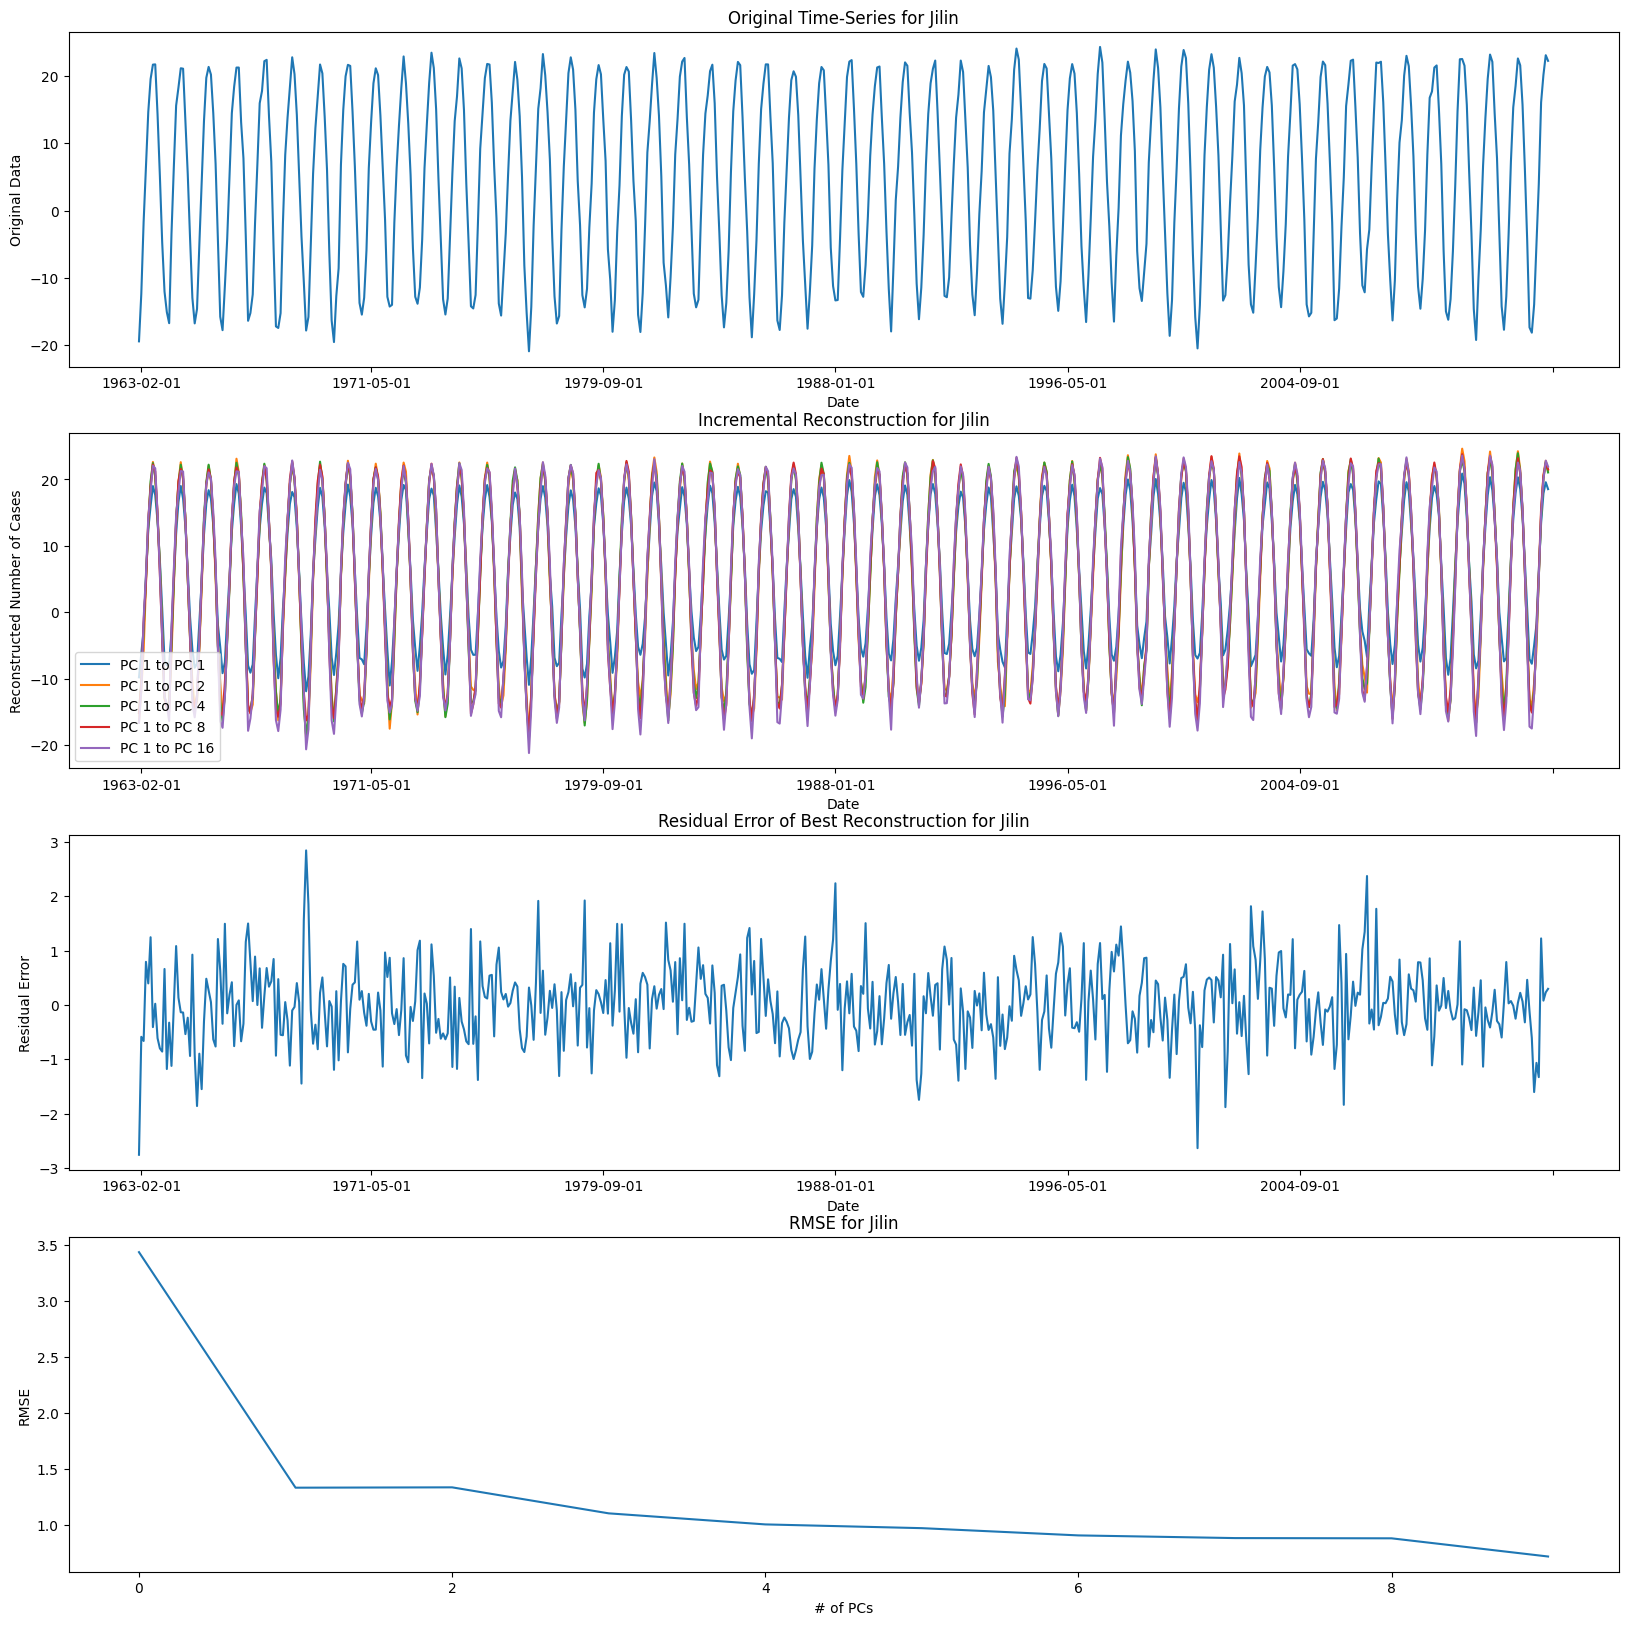

In [ ]:
plot_state_figures_svd(temperature_state, 'Jilin')

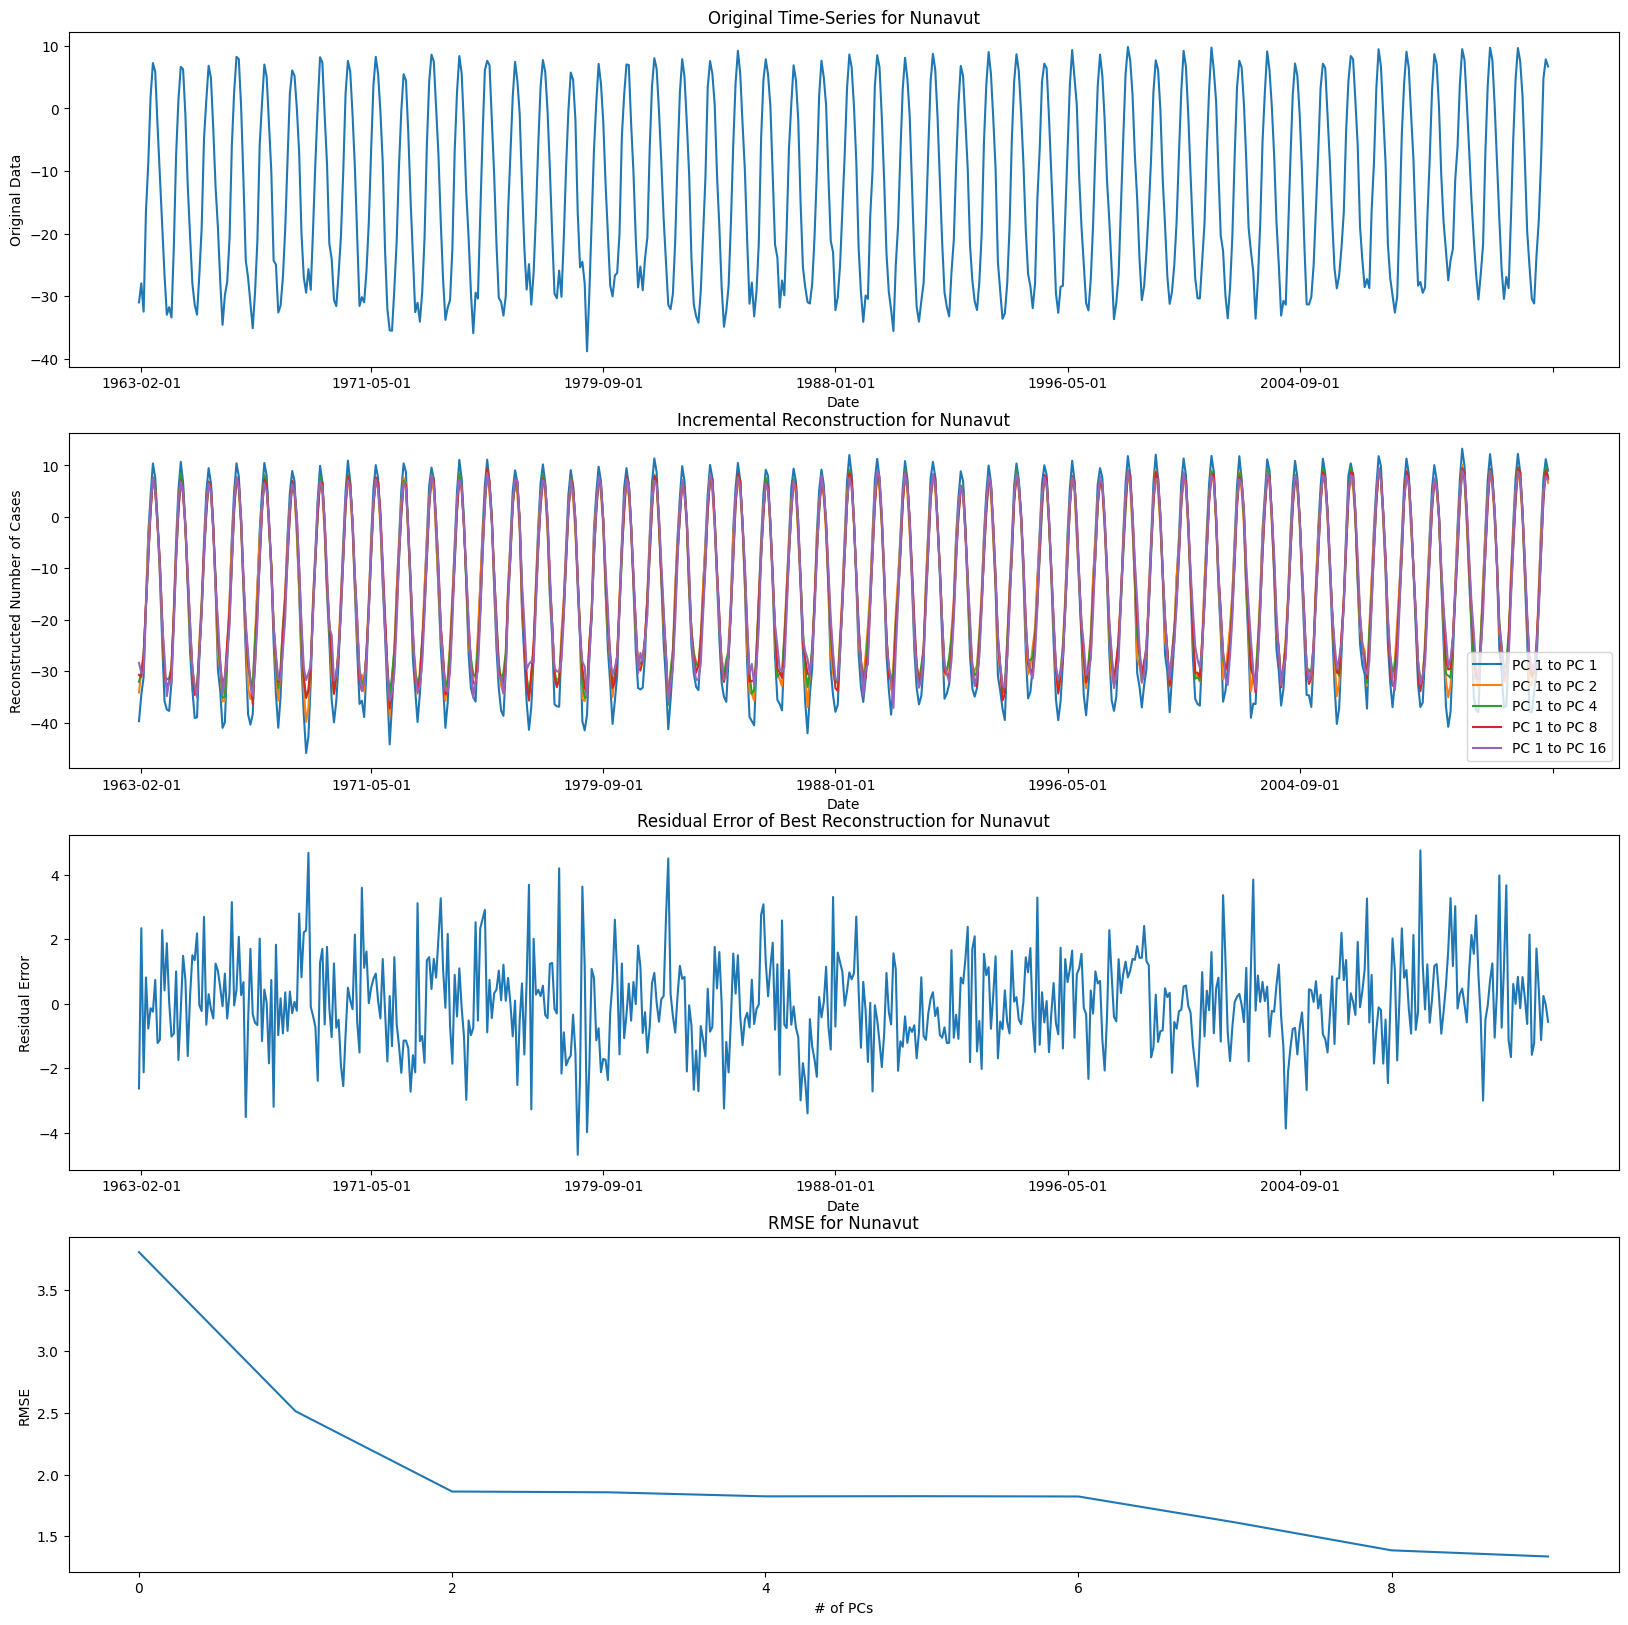

In [ ]:
plot_state_figures_svd(temperature_state, 'Nunavut')

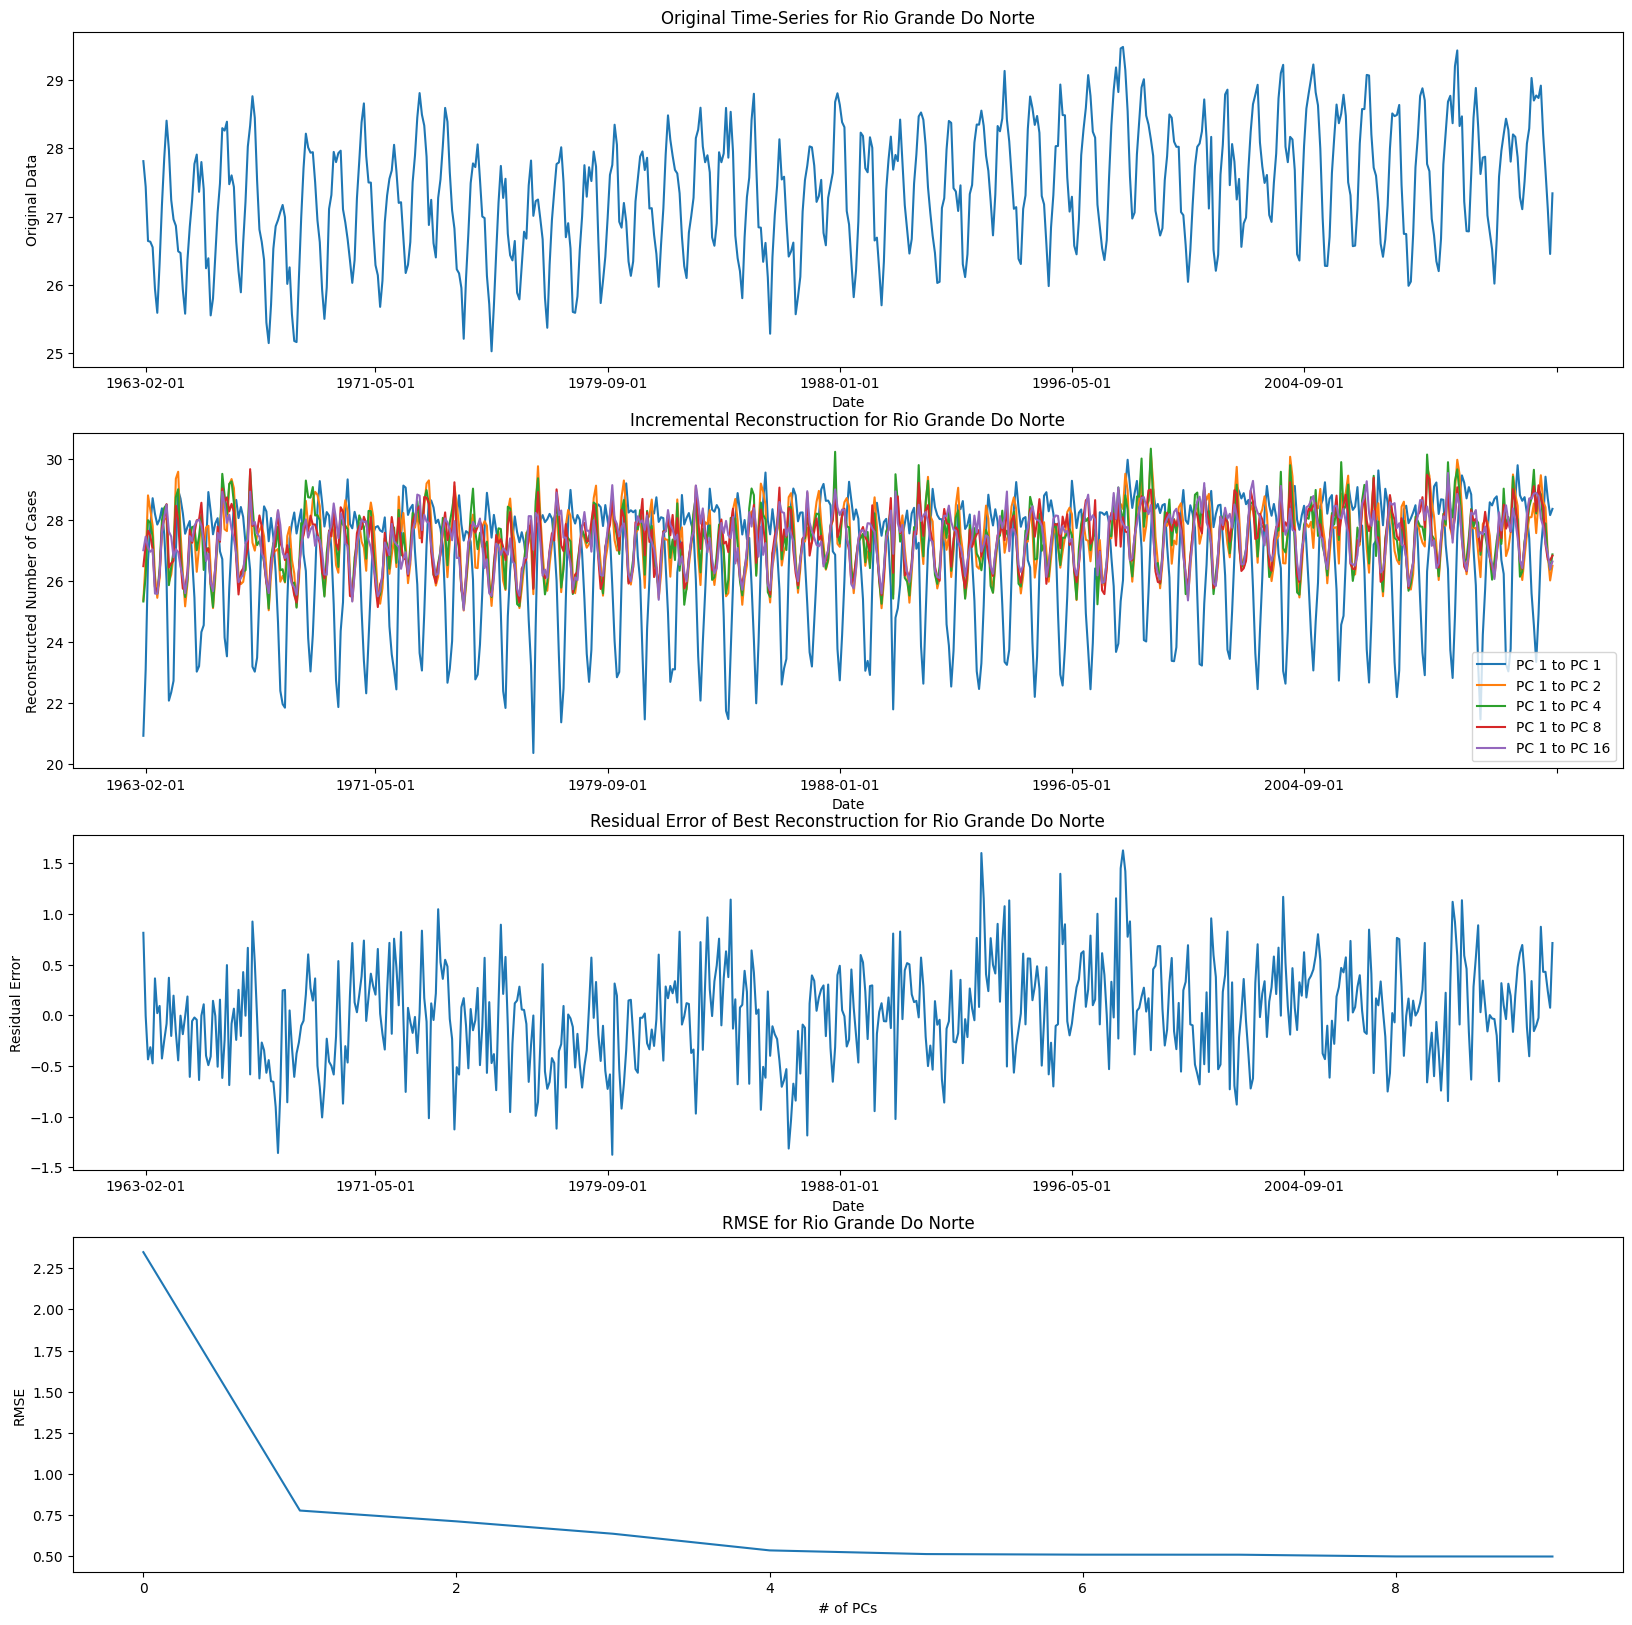

In [ ]:
plot_state_figures_svd(temperature_state, 'Rio Grande Do Norte')

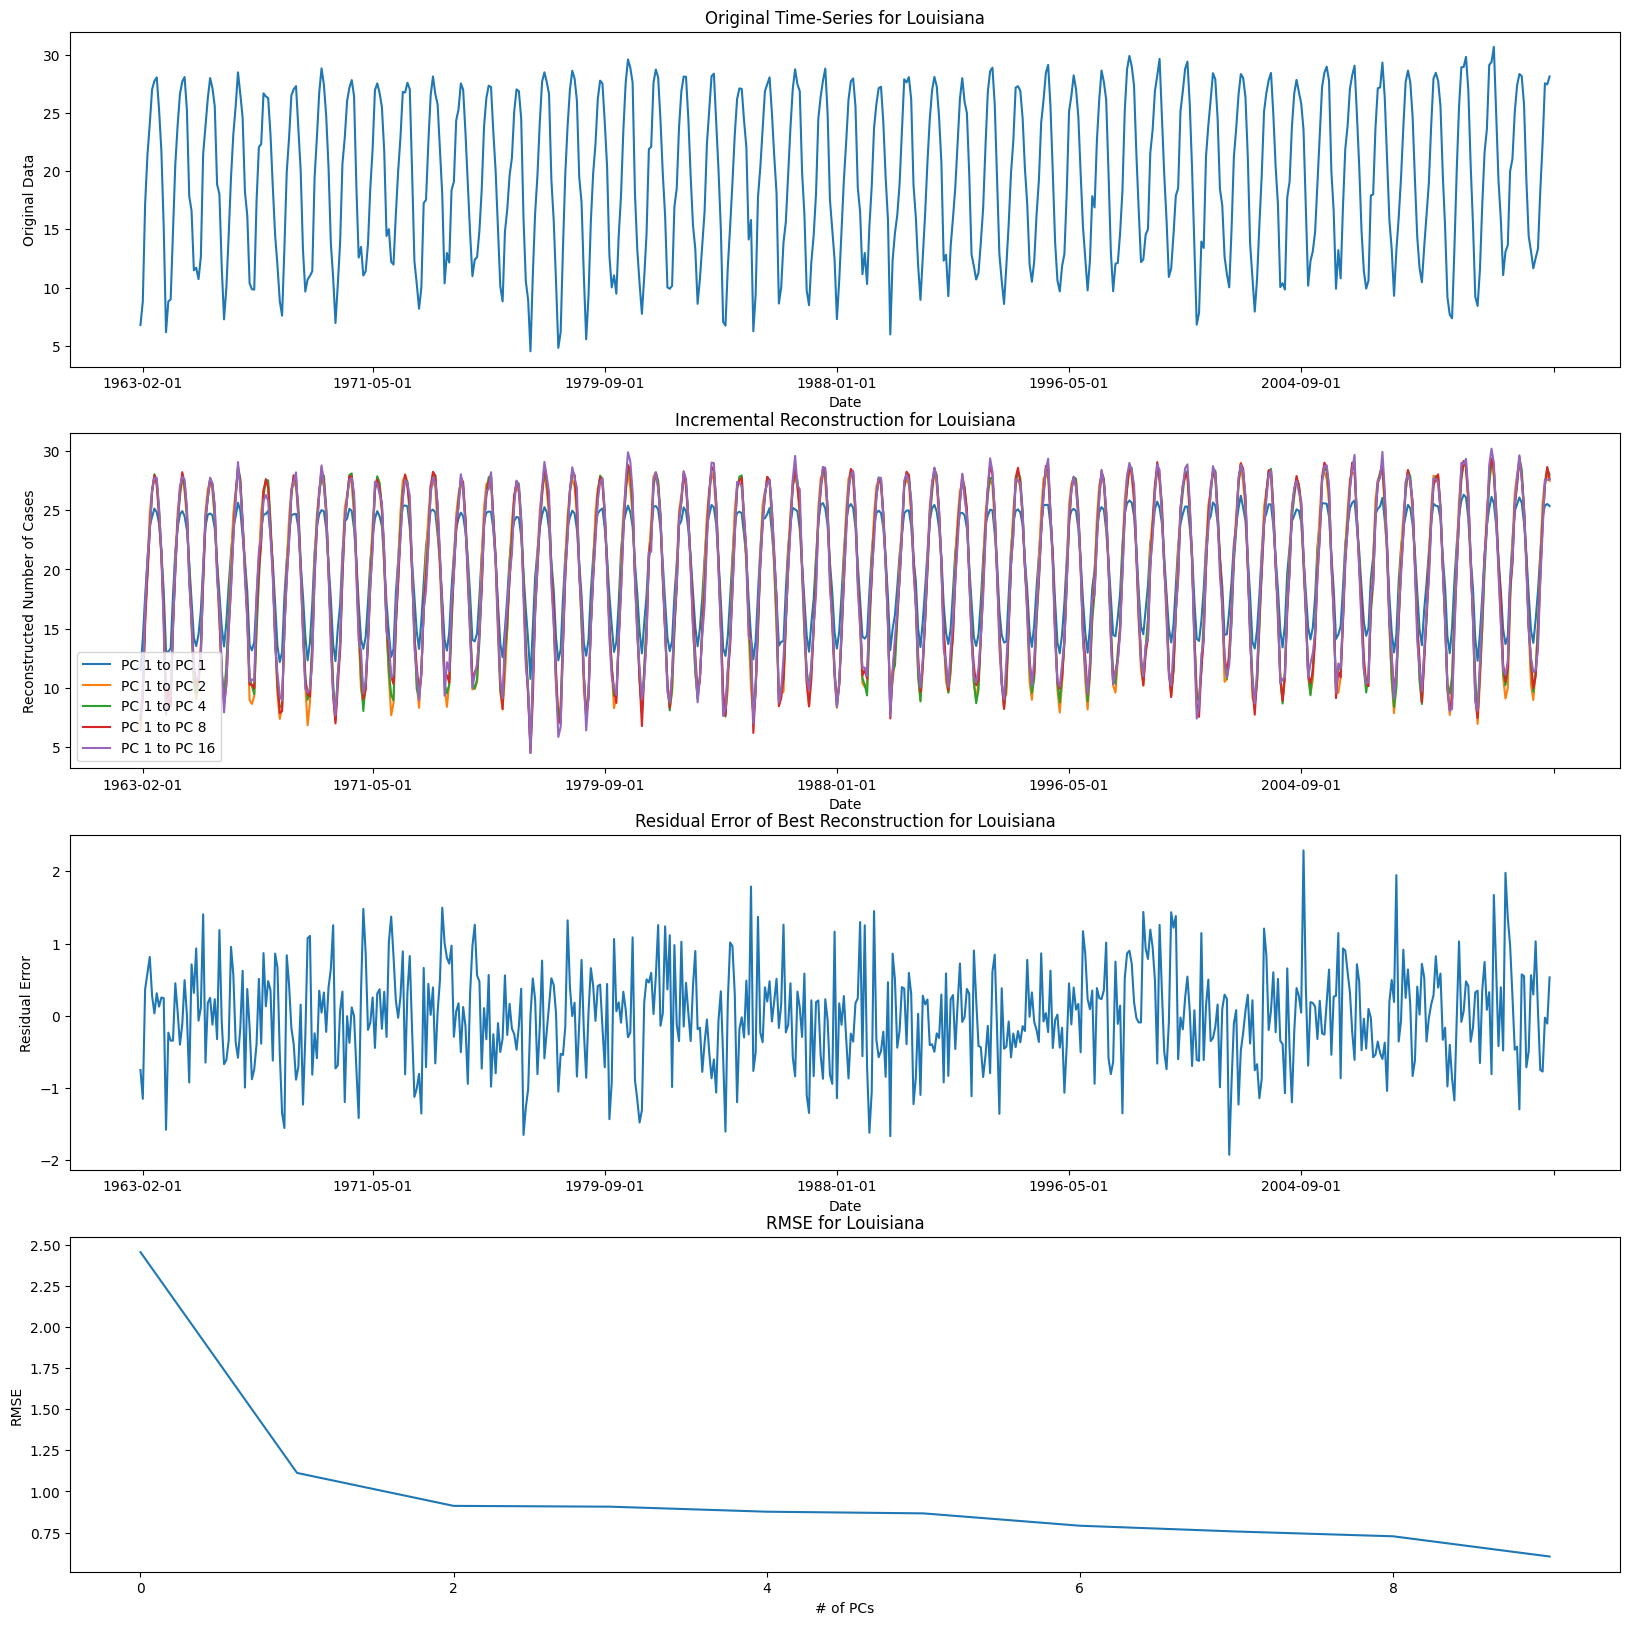

In [ ]:
plot_state_figures_svd(temperature_state, 'Louisiana')

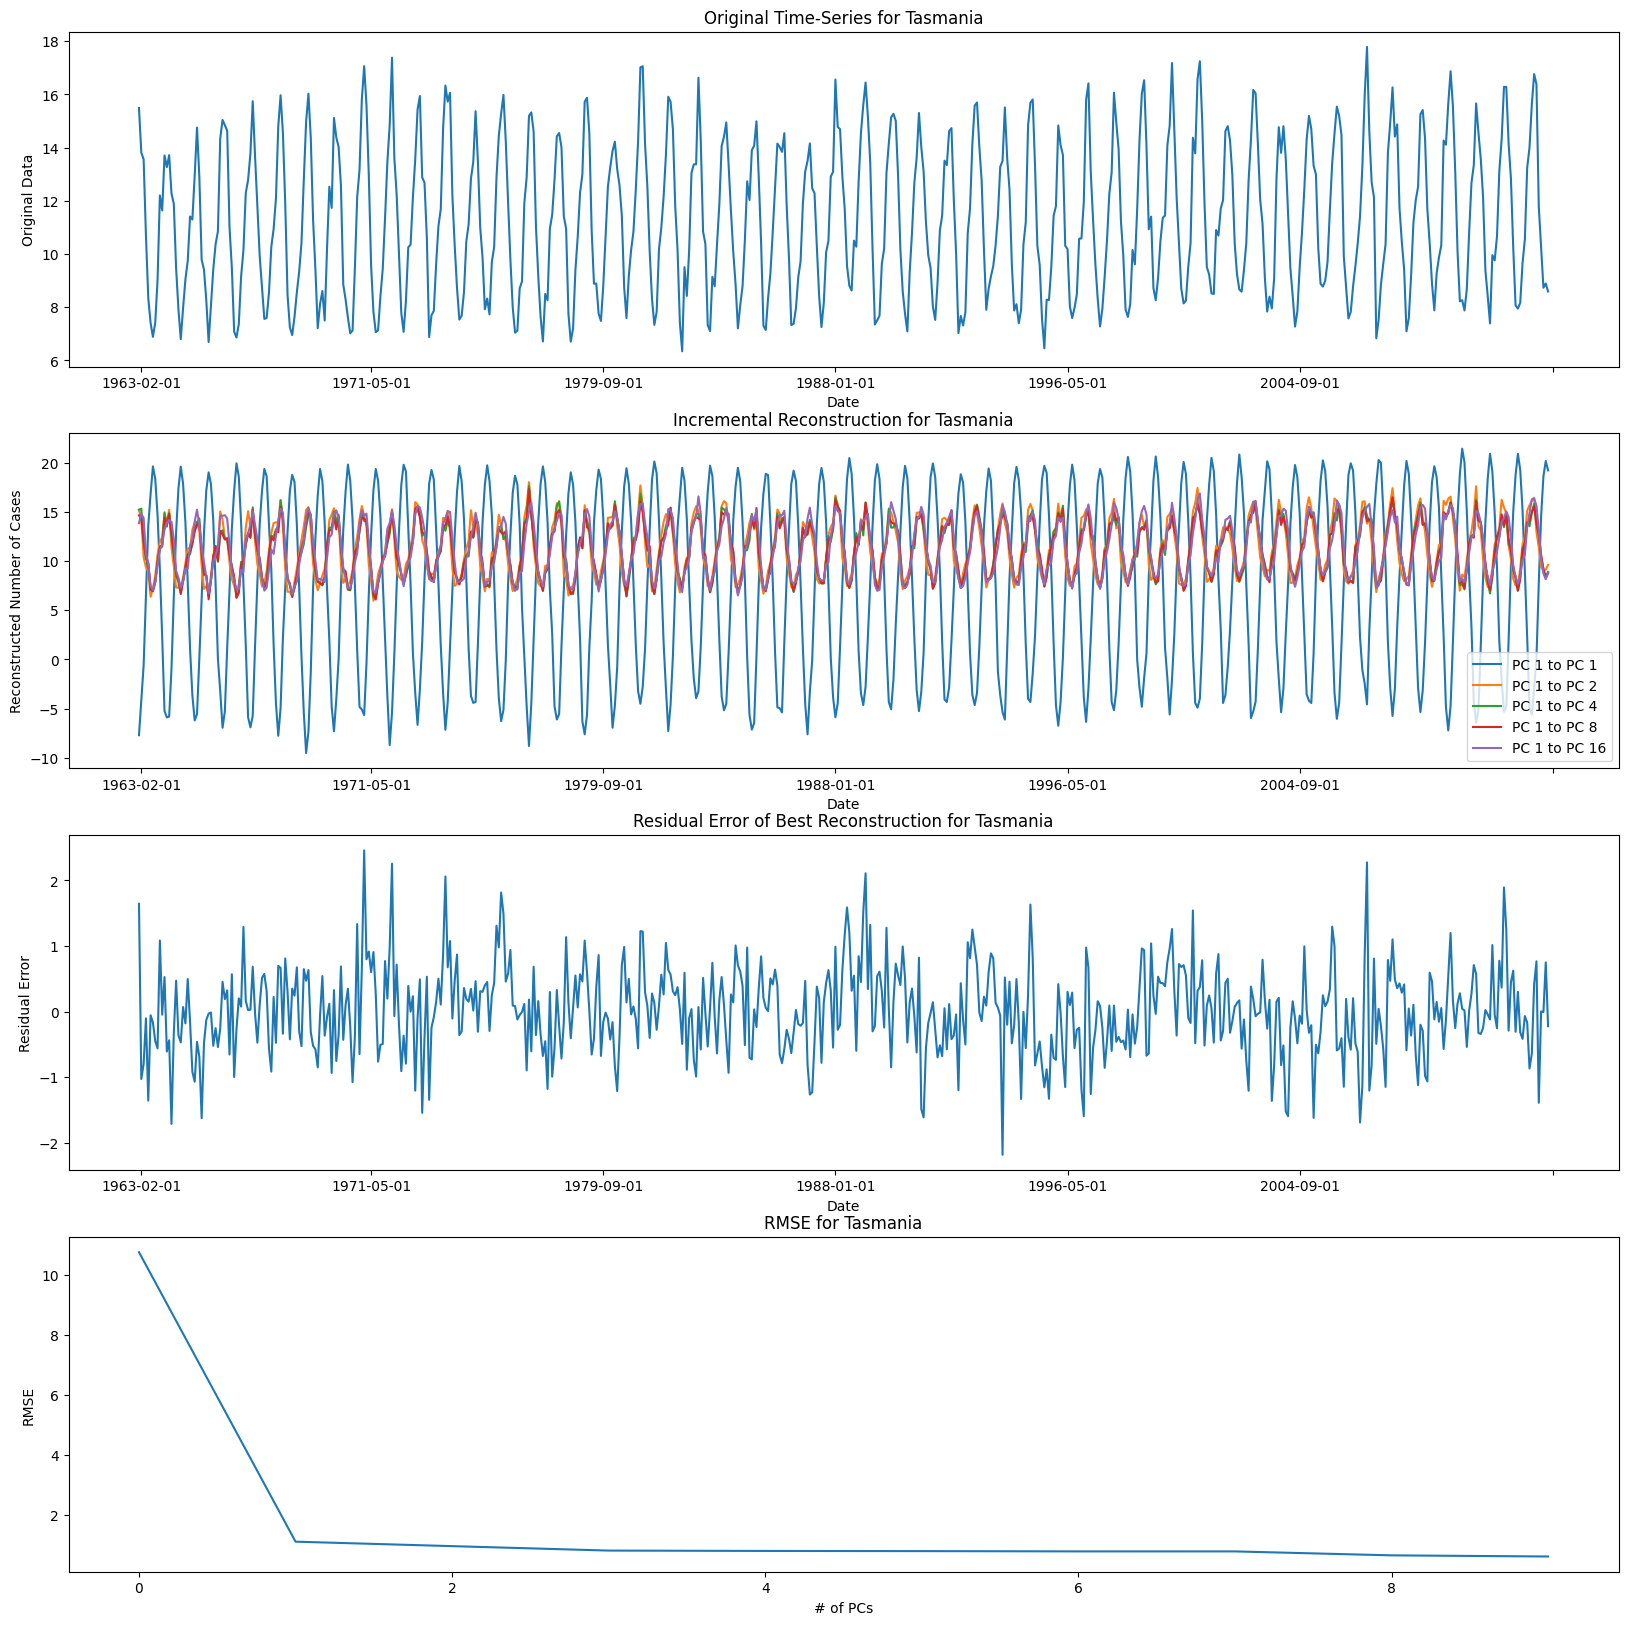

In [ ]:
plot_state_figures_svd(temperature_state, 'Tasmania')

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html APS1070_Project_3.ipynb

[NbConvertApp] Converting notebook APS1070_Project_3.ipynb to html
[NbConvertApp] Writing 9637120 bytes to APS1070_Project_3.html


# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Temperature Data:

1. https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

2. https://berkeleyearth.org/data/

